In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
from collections import defaultdict
from scipy.optimize import curve_fit
from matplotlib.offsetbox import AnchoredText

In [2]:
#!jt -t onedork -> dark mode, r monokai
#!jt -t 

In [5]:
JOYO = "joyo_kanji.csv"
FREQ = "freq_list.csv"

In [7]:
stroke_df = pd.read_csv(JOYO,header=0,usecols=["new","strokes"])
freq_df = pd.read_csv(FREQ)

In [12]:
stroke_df.head()

,new,strokes
0,亜,7
1,哀,9
2,挨,10
3,愛,13
4,曖,17


In [15]:
freq_df.head()

,Word,Frequency
0,の,1612852
1,に,912916
2,を,894982
3,が,437742
4,て,430296


In [22]:
K_PATTERN = r"([一-龯])" #r"([一-龯]+)"

In [23]:
test = "これは漢字のある文章です。もっと漢字を使え！"

In [24]:
re.findall(K_PATTERN,test)

['漢', '字', '文', '章', '漢', '字', '使']

In [25]:
def regex_filter(val,regex):
    if val:
        mo = re.search(regex,val)
        if mo:
            return True
        else:
            return False
    else:
        return False

In [26]:
freq_filtered = freq_df[freq_df['Word'].apply(regex_filter,regex=K_PATTERN)]

In [28]:
freq_filtered.head()

,Word,Frequency
13,ローマ字,158036
21,人,99713
22,名,96459
34,的,55390
35,二,54078


In [29]:
def only_kanji(text):
    return "".join(re.findall(K_PATTERN,text))

In [30]:
kanji_df = freq_filtered.copy()

In [31]:
kanji_df["Word"] = kanji_df["Word"].apply(only_kanji)

In [33]:
kanji_df.head()

,Word,Frequency
13,字,158036
21,人,99713
22,名,96459
34,的,55390
35,二,54078


In [34]:
kanji_df["Word"].str.count("人").sum()

1052

In [40]:
char_dict = {}
word_list = kanji_df["Word"].to_list()

In [41]:
k_list = []

for word in word_list:
    res = re.findall(K_PATTERN,word)
    if len(res) > 0:
        k_list += res

['字']
['人']
['名']
['的']
['二']
['年']
['者']
['形']
['五']
['語']
['物']
['三']
['同']
['四']
['下']
['日']
['上']
['中']
['意']
['他']
['音']
['動']
['画']
['家']
['八']
['心']
['一']
['部']
['時', '代']
['法']
['日', '本']
['略']
['九']
['時']
['化']
['目']
['科']
['六']
['花']
['用']
['性']
['大']
['自']
['手']
['所']
['物', '語']
['国']
['江', '戸']
['水']
['七']
['後']
['書']
['多']
['口']
['間']
['葉']
['中', '国']
['地']
['万']
['色']
['体']
['御']
['特']
['子']
['類']
['本']
['前']
['数']
['事']
['源', '氏', '物', '語']
['用']
['十']
['表']
['金']
['第']
['状']
['見']
['県']
['方']
['万', '葉', '集']
['変']
['彼']
['女']
['物', '事']
['用']
['神']
['文']
['字', '形']
['記']
['集']
['市']
['小']
['山']
['木']
['代']
['学']
['自', '分']
['風']
['医']
['出']
['力']
['長']
['仏']
['相', '手']
['高']
['約']
['社', '会']
['行']
['訓']
['状', '態']
['道']
['内']
['月']
['部', '分']
['何']
['給']
['総', '称']
['身']
['主', '義']
['薬']
['会']
['石']
['多']
['浄', '瑠', '璃']
['船']
['字']
['地', '方']
['総']
['男']
['種']
['主']
['頭']
['酒']
['声']
['鳥']
['魚']
['天']
['副']
['気']
['世']
['一', '種']
['紙']
['馬']
['足']
['面']
['夏']
['点']
['草

['協', '力']
['戯', '曲']
['原', '則']
['区', '域']
['会', '計']
['場', '面']
['見']
['胃']
['梵', '語']
['糖']
['金', '銀']
['吾']
['飛', '行']
['重']
['切']
['藍']
['赤']
['水', '面']
['獣']
['夕', '顔']
['知']
['掛']
['首', '相']
['創', '設']
['皇', '子']
['著', '作']
['脂', '肪']
['苦']
['年', '金']
['有', '機']
['漢', '方']
['鉛']
['酸', '素']
['争']
['持']
['垂']
['海', '上']
['春', '秋']
['相', '談']
['遺', '伝']
['後', '世']
['粒']
['近']
['預', '金']
['一', '派']
['設', '備']
['集', '中']
['筋', '肉']
['方', '言']
['買']
['達']
['在', '位']
['送']
['刊', '行']
['改', '元']
['顔']
['回']
['運']
['艶']
['青', '年']
['予', '定']
['飲']
['結']
['古', '名']
['又']
['報', '告']
['僕']
['技', '法']
['以', '南']
['付', '属']
['翅']
['役', '所']
['衛', '星']
['供']
['沖', '縄']
['生', '殖']
['参']
['買']
['大', '坂']
['助']
['根', '本']
['記', '念']
['覚']
['争']
['許']
['医', '者']
['大', '将']
['韓']
['祝']
['机']
['良']
['越']
['鷹']
['庵']
['森']
['紋', '所']
['親', '王']
['逃']
['相', '対']
['保', '存']
['明', '日']
['以']
['蒸', '気']
['永', '代']
['功']
['医', '師']
['雁']
['浮', '世', '草', '子']
['評', '判']
['装', '束']
['屋', '敷']
['鶴']
['秦']
['

['確', '実']
['話', '手']
['能', '楽']
['碁']
['直']
['因']
['清', '音']
['傍']
['覆']
['恐', '怖']
['宿', '駅']
['有', '毒']
['吹']
['壇']
['神', '奈', '川']
['贈']
['検']
['貸']
['割', '引']
['移', '植']
['万', '物']
['支', '出']
['解']
['股']
['皇', '室']
['台', '所']
['混']
['辻']
['名', '高']
['自', '慢']
['受', '信']
['育']
['限']
['直', '立']
['夜', '明']
['硬']
['合']
['杭']
['曼', '荼', '羅']
['向']
['辞', '典']
['遊', '郭']
['田', '中']
['美', '味']
['静', '脈']
['琉', '球']
['中', '納', '言']
['生']
['馬', '鹿']
['藩', '主']
['上', '演']
['蠅']
['審']
['通', '路']
['取', '材']
['消', '滅']
['賀', '茂']
['表', '紙']
['過']
['移']
['婚']
['知', '覚']
['百', '姓']
['割']
['打', '消']
['土', '俵']
['祝']
['提', '灯']
['破']
['清', '涼']
['大', '乗']
['入', '学']
['益']
['通', '用']
['単']
['日', '本', '海']
['下']
['玩', '具']
['漁']
['今', '度']
['減', '少']
['吉', '田']
['山', '口']
['具', '足']
['問', '屋']
['欲', '望']
['愛', '知']
['養']
['皇', '族']
['動', '植', '物']
['有', '力']
['天', '保']
['球', '状']
['流', '体']
['罰']
['読', '書']
['遺']
['四', '月']
['喧', '嘩']
['支', '援']
['孟', '子']
['返']
['礼', '儀']
['措', '置']
['内', '臓']
['長',

['予', '約']
['凝', '固']
['妨', '害']
['正', '当']
['伽']
['鮎']
['青', '森']
['邸']
['進']
['寺', '社']
['真', '木']
['任']
['断', '定']
['許', '容']
['微', '生', '物']
['広', '大']
['定', '理']
['植']
['老', '中']
['豊', '富']
['内', '侍']
['熱', '心']
['婚', '礼']
['適', '応']
['幻']
['律', '令']
['時', '機']
['洗']
['浪', '花']
['臨', '済', '宗']
['押']
['慈', '悲']
['練']
['用', '水']
['熱', '中']
['開', '催']
['伏']
['弓', '矢']
['噴', '火']
['嘴']
['柔']
['添', '加']
['多', '角']
['並']
['疲', '労']
['網', '代']
['陥']
['原', '義']
['軟', '骨']
['間', '違']
['地', '主']
['知', '的']
['膚']
['悩']
['創', '作']
['系', '列']
['煮']
['散']
['只']
['紀', '伊']
['埋']
['事', '象']
['同', '国']
['解', '明']
['存']
['咳']
['下']
['督']
['浄', '土', '宗']
['配']
['不', '意']
['学', '名']
['体', '温']
['中', '継']
['閉']
['主', '権']
['仲', '介']
['済']
['佐', '渡']
['立', '憲']
['供']
['遍']
['安']
['左', '手']
['演', '算']
['調', '停']
['切', '断']
['修', '道']
['井', '筒']
['飾']
['含']
['漏']
['葉', '腋']
['胎', '児']
['総', '会']
['共', '有']
['廻']
['瘤']
['曇']
['近', '松']
['有', '価']
['学', '級']
['揚']
['胸', '部']
['殷']
['缶']
['時', '節']
['恐']
['

['人', '相']
['心']
['悩']
['大', '嘗', '祭']
['遺', '体']
['守', '護', '神']
['祝']
['述']
['敷', '地']
['楽']
['弓', '張', '月']
['白', '山']
['一', '等']
['取', '出']
['抗', '議']
['大', '河']
['治']
['剰', '余']
['孤', '独']
['欠', '陥']
['凹', '凸']
['必', '然']
['孤']
['蹄']
['弁', '論']
['祈']
['謀']
['売']
['跳', '躍']
['談', '話']
['恵']
['山', '王']
['前', '田']
['仰']
['焼', '失']
['黄', '葉']
['店', '頭']
['歓', '迎']
['双', '六']
['上', '陸']
['売', '上']
['不', '純', '物']
['食']
['道', '筋']
['肥', '後']
['使', '役']
['結', '末']
['清']
['濃', '厚']
['胃', '腸']
['早', '期']
['急']
['文', '中']
['巡']
['黙']
['恵']
['運']
['損', '傷']
['国']
['筆', '記']
['買', '物']
['宝', '物']
['近', '似']
['日', '時']
['先', '立']
['単', '体']
['着', '生']
['法', '相']
['砧']
['延']
['決', '議']
['村', '上']
['篠']
['乞']
['温', '室']
['脂', '質']
['削']
['島', '崎']
['中', '性']
['情', '事']
['腋']
['市', '中']
['傾']
['比', '重']
['船', '員']
['長', '江']
['出', '入', '口']
['俺']
['病', '状']
['眠']
['語', '族']
['東']
['前', '衛']
['不', '利']
['大', '王']
['目', '盛']
['暖']
['邑']
['教']
['晒']
['色', '紙']
['無', '礼']
['猶', '予']
['修']
['軍', '備']


['返', '還']
['欧', '文']
['姦']
['旅', '先']
['漸']
['渦', '巻']
['看']
['話', '合']
['牝']
['素', '襖']
['背', '負']
['数', '多']
['碁', '石']
['小', '林']
['刈']
['叙', '位']
['天', '文', '台']
['計', '測']
['活', '版']
['津', '波']
['幼', '生']
['慣', '性']
['外', '局']
['開', '店']
['撓']
['木', '芽']
['加', '持']
['血', '気']
['裁']
['玄', '米']
['採', '択']
['周', '旋']
['修']
['早', '苗']
['拙']
['金', '襴']
['風', '化']
['口', '中']
['隻']
['発', '祥']
['楽']
['疹']
['安', '宅']
['起', '伏']
['抑']
['羽', '衣']
['在', '家']
['重']
['今', '宵']
['巾', '着']
['抗', '争']
['継', '手']
['拷', '問']
['見', '舞']
['全', '域']
['総', '務']
['舶', '来']
['身', '振']
['帰', '属']
['利', '潤']
['懸']
['壊', '死']
['格', '別']
['鉄', '漿']
['雌']
['規', '約']
['面', '白']
['阿', '部']
['楠']
['損', '得']
['移', '入']
['産']
['習', '性']
['高']
['北', '野']
['煮']
['不', '愉', '快']
['綴']
['憑']
['先', '例']
['物', '言']
['奄', '美']
['忍']
['支', '那']
['河', '東']
['軟']
['質', '屋']
['神', '体']
['札', '幌']
['亀', '甲']
['扶', '助']
['良']
['崩']
['戦', '前']
['繞']
['五', '重', '塔']
['及']
['金', '春']
['買', '収']
['教', '理']
['不', '利', '益']
['已', '然'

['痕', '跡']
['竜', '王']
['科', '挙']
['取', '手']
['絶', '望']
['獣', '類']
['初', '春']
['発', '症']
['会']
['出', '所']
['真', '意']
['反', '逆']
['忠', '信']
['懐', '紙']
['検', '閲']
['醍', '醐']
['感', '傷']
['幾']
['動', '員']
['盲', '人']
['敬', '語']
['雪', '隠']
['残']
['私', '人']
['独', '奏']
['馬', '上']
['犂']
['外', '用']
['陣', '中']
['専']
['最', '澄']
['単', '数']
['屏']
['砕', '屑']
['可', '変']
['噛']
['挟']
['全', '書']
['楊', '柳']
['阿', '闍', '梨']
['断']
['卑', '下']
['鎚']
['品', '目']
['欲']
['捨']
['道', '端']
['乗', '用']
['翻']
['扱']
['先', '陣']
['襄']
['分']
['綿', '入']
['免']
['地', '衣']
['系', '譜']
['聖', '地']
['上']
['付', '合']
['遺', '構']
['内', '野']
['平', '織']
['下', '宿']
['竹', '筒']
['短', '波']
['時', '宗']
['男', '児']
['名', '勝']
['大', '目']
['安', '否']
['褻']
['何']
['下', '腹']
['行', '末']
['利', '己']
['於']
['自', '作']
['五', '色']
['高', '句', '麗']
['主', '食']
['生', '葉']
['山', '海']
['臨', '海']
['満']
['有', '線']
['地', '平', '線']
['一', '段']
['太', '田']
['博', '奕']
['名', '作']
['華', '北']
['遠', '国']
['吹', '草']
['楷', '書']
['停', '車']
['送', '電']
['財', '界']
['優', '遇']
['量']


['類', '推']
['喝', '采']
['観', '衆']
['隠']
['甘', '露']
['光', '栄']
['雨', '風']
['生', '姜']
['神', '主']
['半', '生']
['不', '備']
['踏', '歌']
['貫', '之']
['恋', '心']
['矧']
['宗', '家']
['家', '紋']
['嗜', '好']
['怨']
['陣', '立']
['窟']
['葺']
['次', '期']
['参', '政']
['法', '語']
['紋', '章']
['華', '厳', '宗']
['需', '給']
['雑', '居']
['悔']
['炊']
['肺', '結', '核']
['出', '征']
['郊']
['封', '印']
['計', '数']
['引', '寄']
['逃', '走']
['海']
['卸', '売']
['朝', '鮮', '民', '主', '主', '義', '人', '民', '共', '和', '国']
['転', '売']
['小', '歌']
['退', '却']
['裏', '返']
['霊', '神']
['岡', '田']
['換']
['近', '視']
['収']
['敬']
['聖', '歌']
['弾', '劾']
['猥', '褻']
['外', '聞']
['黒', '木']
['断', '絶']
['地', '方', '自', '治', '体']
['騒']
['鋳', '鉄']
['吸', '物']
['些', '細']
['見', '出']
['錏']
['翻', '案']
['愛']
['結', '集']
['手', '荷', '物']
['橡']
['葦', '毛']
['桜', '子']
['紺', '色']
['飛', '来']
['平', '曲']
['賀', '茂', '真', '淵']
['鰺']
['望']
['飲', '用']
['下', '田']
['恋']
['準', '拠']
['取', '扱']
['東', '征']
['一', '宮']
['新', '型']
['理', '髪']
['驚']
['荒', '磯']
['大', '日']
['旅', '費']
['気']
['侵', '攻']
['胡', '桃

['担']
['治']
['王', '制']
['手']
['凪']
['罠']
['開', '国']
['木', '口']
['創', '世']
['浮', '力']
['光', '年']
['岡', '崎']
['一', '挙']
['心', '学']
['博', '文']
['安', '堵']
['襠']
['取', '次']
['坪', '内']
['浪', '漫']
['損']
['地', '租']
['葎']
['海', '草']
['殿', '下']
['食', '後']
['劣']
['猟', '犬']
['奇', '特']
['入', '母', '屋']
['松', '木']
['打', '出']
['学', '童']
['落', '雷']
['守']
['大', '峰']
['電', '磁', '気']
['極', '点']
['腕', '時', '計']
['享', '楽']
['毛', '氈']
['呑']
['癒', '着']
['建', '玉']
['中', '高']
['薄', '片']
['明', '治', '天', '皇']
['書', '法']
['大', '風']
['倶', '舎']
['勝']
['下', '向']
['集', '録']
['転']
['襤', '褸']
['水', '火']
['体', '型']
['水', '稲']
['読']
['一', '筆']
['雑', '談']
['水', '夫']
['不', '調']
['檻']
['統', '帥']
['死', '因']
['十', '戒']
['教', '練']
['透', '析']
['亀', '裂']
['調', '書']
['河', '水']
['分']
['基', '幹']
['銀', '製']
['宅', '配']
['元', '帳']
['漿']
['淋', '菌']
['短', '音', '階']
['阿', '修', '羅']
['間', '道']
['妓']
['川', '口']
['勇']
['算', '法']
['青', '砥']
['讐']
['絞', '染']
['絵', '入']
['衣', '手']
['北', '原']
['御', '許']
['晩', '夏']
['屠', '蘇']
['多', '摩', '川']
['跡'

['目', '玉']
['疏', '長']
['素', '焼']
['郎', '等']
['泣', '声']
['寂']
['止']
['筋', '力']
['携']
['落', '城']
['弥', '勒', '菩', '薩']
['重', '合']
['梵', '字']
['御', '息', '所']
['楸', '邨']
['倦', '怠']
['内', '皮']
['赤', '絵']
['祝', '事']
['転']
['話']
['外', '山']
['無', '謀']
['悪', '鬼']
['恋']
['萌']
['裃']
['勤', '番']
['内', '匠']
['垂', '線']
['銘', '仙']
['征', '夷', '大', '将', '軍']
['攪', '拌']
['海', '士']
['預', '託']
['週', '末']
['繊', '維', '素']
['間']
['国', '人']
['懇']
['池', '坊']
['挿', '頭']
['主', '税']
['聚']
['転', '回']
['迎', '合']
['軽', '油']
['甘', '酒']
['糖', '蜜']
['袋', '網']
['再', '発']
['浜', '田']
['柊']
['春', '夫']
['硬', '水']
['古', '跡']
['幻', '影']
['要', '人']
['案']
['江', '戸', '川']
['得', '度']
['彝']
['言', '換']
['同', '格']
['国', '分']
['小', '学', '生']
['違', '憲']
['客', '人']
['声', '援']
['敷', '石']
['棟', '梁']
['西', '本', '願', '寺']
['横', '光']
['異', '状']
['泥', '土']
['板', '間']
['日', '経']
['罰']
['捲']
['衆', '議']
['秀', '雄']
['波', '紋']
['神', '護']
['公', '人']
['藷']
['不', '器', '用']
['菩', '提', '樹']
['高']
['図', '示']
['持', '久']
['遁', '世']
['正', '邪']
['神', '託']
['

['教', '唆']
['季', '節', '風']
['有', '名', '人']
['波', '止', '場']
['僧', '堂']
['突', '出']
['弾', '道', '弾']
['佐', '久', '間']
['役', '務']
['銀', '糸']
['整', '列']
['関', '口']
['訓', '詁']
['人', '面']
['展', '性']
['耄']
['詰', '込']
['黄', '蘗']
['国', '子']
['背', '骨']
['救']
['膝', '頭']
['本', '領']
['食', '止']
['特', '売']
['煮']
['見', '聞']
['由', '良']
['練', '貫']
['不', '揃']
['受', '給']
['発', '振', '器']
['拗', '音']
['車', '庫']
['電', '化']
['痒']
['倒', '立']
['太', '極']
['頼']
['身', '心']
['格', '闘', '技']
['遵', '守']
['病', '棟']
['凭']
['鐘', '楼']
['載']
['招', '集']
['濁', '酒']
['貫', '入']
['苦', '行']
['謄', '写', '版']
['伝', '書']
['拠']
['経', '論']
['出', '入']
['時', '局']
['流', '速']
['宣', '誓']
['淑']
['部', '員']
['散', '華']
['古', '銭']
['下', '車']
['値', '下']
['精', '一', '杯']
['逃', '避']
['不', '眠']
['邪', '念']
['資']
['歳', '旦']
['割', '増']
['出', '立']
['引']
['孕']
['依']
['塞']
['買', '戻']
['語', '勢']
['虚', '数']
['射', '程']
['合']
['平', '明']
['販', '路']
['碾']
['定', '信']
['法', '被']
['着', '尺']
['低', '級']
['赤', '身']
['辛', '口']
['滝', '川']
['崇', '敬']
['映']
['輝']
['萌', '黄']


['福', '山']
['両', '刀']
['望', '遠']
['山', '繭']
['雨', '林']
['荒', '海']
['天', '幕']
['阿', '弥', '陀', '堂']
['多']
['漢', '人']
['引', '回']
['気']
['洗', '張']
['朱', '印', '船']
['望']
['茂', '吉']
['有', '田']
['樹', '陰']
['直', '訳']
['溶', '性']
['性']
['国', '軍']
['黒']
['取', '残']
['外', '車']
['惟', '神']
['左', '義', '長']
['花', '歌']
['本', '態']
['憤', '怒']
['小', '惑', '星']
['占', '拠']
['恍', '惚']
['親', '会', '社']
['績']
['些']
['好', '景', '気']
['一', '宮']
['板', '戸']
['払', '子']
['信', '濃', '川']
['先', '立']
['取', '戻']
['稿', '本']
['大', '功']
['基', '音']
['子', '安']
['厳', '正']
['牛', '皮']
['著', '大']
['楽', '座']
['産', '品']
['有', '志']
['剛', '者']
['利', '点']
['点']
['日', '系']
['豪', '快']
['頼']
['栄', '達']
['組', '換']
['糸', '目']
['人', '丸']
['射', '場']
['長']
['塒']
['老', '木']
['理', '化', '学']
['蹲', '踞']
['春', '水']
['員', '外']
['蚯', '蚓']
['珪']
['創', '意']
['勃', '起']
['馬', '手']
['胡', '頽', '子']
['野', '火']
['下', '山']
['北', '辺']
['受', '渡']
['左', '舷']
['憂']
['太', '秦']
['白', '鷺']
['啼']
['骨', '牌']
['打', '明']
['帰', '去', '来']
['親', '鳥']
['解', '法']
['北', '日', '本'

['近', '代', '詩']
['着', '座']
['高', '井']
['束', '髪']
['雲', '煙']
['筮']
['春', '日', '野']
['深', '田']
['海', '風']
['鮮', '度']
['引']
['直', '訴']
['溜']
['隠', '家']
['弱', '酸']
['三', '角', '州']
['微', '粉']
['賭', '事']
['攻', '防']
['音', '源']
['忽']
['板', '屋']
['鯣']
['凌']
['生', '誕']
['内', '圧']
['付', '添']
['八', '大', '地', '獄']
['蝦', '蟇']
['助', '走']
['侵']
['愚', '者']
['祷']
['初', '恋']
['佃', '煮']
['持', '込']
['謬']
['薬', '玉']
['等', '間', '隔']
['号']
['居', '合']
['傷']
['取']
['打', '消']
['如', '月']
['柾', '目']
['靡']
['頼']
['島', '守']
['交']
['清', '涼', '寺']
['遮']
['醜', '悪']
['横', '須', '賀']
['申', '入']
['顔', '付']
['放']
['分', '与']
['吹', '聴']
['言', '表']
['蘭', '医']
['赤']
['已']
['土', '壇', '場']
['舞']
['同', '郷']
['参']
['植', '込']
['長', '兵', '衛']
['方', '眼']
['一', '神', '教']
['染', '抜']
['法', '帖']
['柾']
['大', '葉']
['仮', '借']
['機', '軸']
['一', '堂']
['心', '安']
['守', '田']
['日', '限']
['里', '帰']
['方', '術']
['概', '括']
['泰', '西']
['銘', '文']
['腰']
['博', '物', '学']
['当', '節']
['引', '越']
['忌', '諱']
['慰', '問']
['何']
['香', '山']
['堂']
['照']
['葬', '列']
['悉

['姐']
['謝', '絶']
['暴', '食']
['油', '彩']
['出']
['縦', '走']
['親', '房']
['天', '眼']
['遠']
['渡']
['大']
['引']
['糸', '竹']
['白']
['抄', '一']
['並', '外']
['旧', '悪']
['改', '鋳']
['分', '秒']
['手', '結']
['先', '達']
['手', '荒']
['火', '取']
['神', '性']
['変', '則']
['都', '鳥']
['大', '熊']
['貫', '首']
['鼻', '水']
['多', '肉', '植', '物']
['恬', '淡']
['釣', '合']
['麥']
['帰', '路']
['桃', '園']
['暗', '証']
['案']
['失', '政']
['伊', '都']
['水', '勢']
['言', '換']
['心', '電', '図']
['軽', '音', '楽']
['細', '君']
['言']
['座', '込']
['求', '道']
['家', '路']
['船', '倉']
['改', '心']
['色', '恋']
['存', '亡']
['天', '竜', '川']
['有', '閑']
['実', '母']
['等', '式']
['片', '意', '地']
['面', '白']
['投', '込']
['外', '輪']
['貴', '公', '子']
['消', '石', '灰']
['木', '仏']
['五', '代']
['驥', '尾']
['魚', '市', '場']
['市', '河']
['一', '難']
['神', '水']
['一', '花']
['鷦', '鷯']
['新', '曲']
['逸', '材']
['一', '笑']
['一', '得']
['水', '時', '計']
['一', '報']
['夷', '狄']
['膨', '満']
['折', '角']
['挑']
['列', '座']
['初', '午']
['省', '令']
['斃']
['山', '鉾']
['語', '意']
['主', '意']
['古', '城']
['生', '残']
['通', '牒']
['源', '太'

['発', '議']
['狭']
['痴', '人']
['寂', '然']
['抗', '毒', '素']
['狐', '塚']
['危', '篤']
['椿', '油']
['飛', '降']
['座', '右']
['続']
['特', '使']
['饗', '膳']
['匪']
['硬', '玉']
['局', '在']
['領', '事', '館']
['降', '誕', '祭']
['名', '花']
['黒', '沢']
['空', '前']
['六', '波', '羅', '蜜']
['往']
['括']
['草', '分']
['泣', '言']
['悲', '報']
['揺', '動']
['次', '点']
['液']
['諠', '譁']
['錯', '乱']
['黒', '雲']
['清', '涼', '飲', '料', '水']
['描', '線']
['皇', '宮']
['私', '権']
['張', '本', '人']
['那', '須', '野']
['暴', '虐']
['小', '口', '切']
['原', '毛']
['育']
['荒']
['俗', '塵']
['光', '速']
['首', '府']
['三', '軍']
['濾']
['召', '出']
['随', '従']
['立', '原']
['横', '腹']
['師', '家']
['練', '兵']
['曹', '達']
['長', '髪']
['更']
['用', '捨']
['参', '観']
['力', '作']
['得', '策']
['積', '込']
['血', '潮']
['抹', '香']
['立']
['自', '身', '番']
['枝', '垂']
['身', '代', '金']
['質', '朴']
['捕', '吏']
['血', '道']
['疱', '疹']
['切', '先']
['写', '字']
['雪']
['丁', '度']
['多', '感']
['建', '前']
['正', '目']
['女', '系']
['食']
['白', '無', '垢']
['水', '練']
['透', '間']
['筋', '違']
['逃', '口', '上']
['野', '天']
['無', '人', '島']
['先', 

['段']
['町', '並']
['土', '俗']
['鳥', '飼']
['名', '分']
['止']
['排', '列']
['物', '量']
['叡', '知']
['笑']
['往', '来']
['差', '止']
['申', '込']
['引', '下']
['目', '覚']
['飼', '鳥']
['歹', '部']
['揚', '幕']
['襪']
['戯', '場']
['悲', '歌']
['型', '染']
['菊', '亭']
['高', '利', '貸']
['発', '露']
['村', '井']
['共', '学']
['自', '利']
['功', '罪']
['等']
['託', '送']
['北']
['遇']
['持']
['間', '尺']
['久', '世']
['必', '需']
['瓷']
['空', '色']
['冫']
['径', '約']
['染', '付']
['悪', '役']
['青', '黒']
['鶏', '頭']
['裾', '濃']
['窪']
['弱']
['赤']
['霜', '雪']
['厭']
['浮', '出']
['男', '心']
['晴', '渡']
['腱']
['上', '澄']
['雲', '水']
['葉', '酸']
['曲', '技']
['花', '代']
['柚', '子']
['蕁', '麻']
['直', '文']
['条']
['旅', '衣']
['茶', '子']
['渋', '沢']
['咄', '露']
['山', '国']
['漁']
['下', '味']
['奪', '回']
['新', '政']
['堀', '越']
['討']
['芦', '田']
['絶', '絶']
['妙', '味']
['干', '戈']
['退', '色']
['能']
['愛', '宕', '山']
['徒', '事']
['浮', '置']
['新', '治']
['合']
['鉄', '面', '皮']
['水', '茎']
['跡', '継']
['主', '審']
['双', '肩']
['科']
['究']
['関', '門', '海', '峡']
['見', '下']
['子', '羊']
['両', '氏']
['幾']
['禅', '尼']
[

['細', '長']
['霖', '雨']
['華', '山']
['忠', '平']
['菓', '子']
['家', '令']
['過', '小']
['水', '屋']
['急', '造']
['三', '和', '音']
['難', '治']
['山']
['絞']
['片', '肌']
['拙', '劣']
['塞']
['不', '粋']
['似']
['豪', '勢']
['強', '打', '者']
['適']
['夜', '回']
['山', '彦']
['聚', '楽', '第']
['咄', '本']
['鎌', '髭']
['近', '東']
['晴', '着']
['神', '領']
['小', '屋', '掛']
['銭', '形']
['省', '内']
['加', '薬']
['補', '色']
['塩', '辛']
['中', '啓']
['筆', '勢']
['嗄']
['川', '路']
['亘']
['剛', '直']
['難', '易']
['頑', '強']
['成', '立']
['俗', '用']
['弁']
['灌', '水']
['淳', '和', '天', '皇']
['無', '得', '点']
['原', '状']
['仁', '政']
['起', '句']
['六', '法']
['消', '去']
['其', '時']
['孤', '高']
['聞', '取']
['節', '目']
['賛', '助']
['気', '丈']
['等', '親']
['蒼', '鉛']
['条', '規']
['町', '方']
['瑞', '雲']
['道', '順']
['船', '脚']
['既', '得']
['木', '原']
['御', '座']
['士', '卒']
['脚', '注']
['序', '破', '急']
['躬']
['宵', '宮']
['飯', '炊']
['頓', '首']
['穹', '窿']
['擁']
['身', '口', '意']
['見', '上']
['滞', '貨']
['富', '者']
['福', '原']
['濡']
['途', '絶']
['切', '上']
['馬', '謖']
['三', '谷']
['信', '用', '金', '庫']
['煤', '竹']

['大', '覚']
['狂', '瀾']
['帛', '紗']
['黒', '住']
['忌', '服']
['関', '根']
['同', '職']
['心']
['挽', '物']
['宿', '痾']
['泥', '沼']
['吸', '取']
['免', '罪']
['大', '喪']
['変', '電']
['積', '立']
['巴', '里']
['挟', '撃']
['軍', '費']
['有', '朋']
['支', '局']
['通', '有']
['北', '半']
['攻', '囲']
['極', '力']
['銃', '床']
['術', '策']
['清', '少', '納', '言']
['惑']
['魚', '粉']
['部', '立']
['近', '時']
['両', '隣']
['推', '奨']
['菎', '蒻']
['止']
['楔', '状']
['狐', '狸']
['薬', '指']
['忍', '込']
['口', '惜']
['愚', '直']
['故', '旧']
['古', '銅']
['道', '俗']
['天', '真']
['吸', '殻']
['脱', '俗']
['走', '出']
['倉', '荷']
['大', '賞']
['示', '合']
['地']
['復', '位']
['黒']
['燻', '蒸']
['睫', '毛']
['桂', '冠', '詩', '人']
['継', '起']
['人', '間', '像']
['傾', '性']
['故', '買']
['軽', '佻']
['蹴', '込']
['申', '文']
['色', '合']
['魔', '性']
['欠', '格']
['月', '例']
['妖', '魔']
['月', '齢']
['握', '鮨']
['引', '継']
['剣', '舞']
['被', '除', '数']
['整', '復']
['極', '寒']
['健']
['言', '言']
['見', '届']
['俸']
['口', '蓋', '垂']
['三', '権', '分', '立']
['初']
['殊', '勲']
['高', '粱']
['葩']
['荼']
['黄', '塵']
['半', '身', '不', '随']
['水',

['節', '付']
['詠', '進']
['花', '心']
['御', '杖']
['打', '擲']
['宿', '敵']
['陣', '内']
['追', '散']
['古', '巣']
['外', '回']
['秒', '速']
['創', '成']
['老', '樹']
['留']
['美', '事']
['訟']
['柳', '葉']
['聞', '入']
['剃']
['備', '長']
['馬', '標']
['目', '立']
['火']
['侍', '大', '将']
['藩', '札']
['歯', '朶']
['夕', '波']
['裏', '腹']
['怨']
['待', '遠']
['売', '子']
['雲', '脚']
['狂', '文']
['取', '柄']
['潁', '川']
['撞']
['不', '文', '法']
['日', '本', '工', '業', '規', '格']
['文', '庫', '本']
['恵', '果']
['主', '我']
['埃', '及']
['越', '度']
['不', '得', '手']
['失', '念']
['侮', '蔑']
['長', '波']
['悔', '改']
['猟', '奇']
['喜', '寿']
['硝', '煙']
['簷']
['円', '運', '動']
['牆', '壁']
['范', '雎']
['挙', '措']
['延', '徳']
['切', '目']
['燕', '麦']
['雍', '正']
['万', '里', '小', '路']
['年', '老']
['追', '抜']
['捨']
['両', '目']
['立', '姿']
['古', '本', '屋']
['闊', '歩']
['王', '事']
['玉', '将']
['攻']
['死', '命']
['勝', '元']
['迎', '春']
['帆', '桁']
['訓', '育']
['昇', '平']
['淀', '君']
['果']
['良', '沢']
['文', '彦']
['割']
['自', '家', '用', '車']
['新', '太', '郎']
['廨']
['小', '磯']
['村', '岡']
['狩', '谷']
['絶', '海']
['手', 

['紀', '淡', '海', '峡']
['仏', '徳']
['艱']
['不', '体', '裁']
['小', '鬢']
['剃', '落']
['紀', '文']
['形', '無']
['片', '棒']
['徒', '渉']
['弓', '筈']
['傷']
['閣', '下']
['新', '釈']
['抱', '朴']
['頃', '合']
['中', '後']
['木', '肌']
['人', '台']
['不', '得', '意']
['圭', '角']
['角', '屋']
['鉗', '口']
['身', '構']
['間', '竿']
['飛', '揚']
['来']
['雅', '邦']
['過', '半']
['画', '板']
['与', '次', '郎']
['雛', '形']
['切', '抜']
['噬']
['検', '束']
['換', '替']
['敷', '皮']
['白', '熊']
['響']
['駆', '立']
['司', '書']
['鳳', '雛']
['筒', '口']
['土', '寄']
['可', '愛']
['高', '炉']
['辞']
['換', '羽']
['管', '下']
['干', '害']
['乾', '期']
['歓', '喜', '天']
['甘', '酸']
['民', '需']
['助', '役']
['高', '率']
['水', '圏']
['号', '泣']
['彫', '塑']
['大', '詔']
['紀', '律']
['乞', '巧', '奠']
['木', '槿']
['心']
['惚', '気']
['隅', '木']
['卑', '語']
['喜', '悦']
['夜', '桜']
['聞', '返']
['聞', '苦']
['三', '吉']
['謹', '聴']
['正', '妃']
['気']
['米']
['俊', '子']
['日', '時', '計']
['木', '酢']
['基', '体']
['胞', '状']
['着', '倒']
['食', '倒']
['魔', '除']
['新', '宅']
['労', '咳']
['塞']
['有', '礼']
['恋', '仲']
['落', '涙']
['逆', '臣']
['門', '前'

['東']
['手', '当', '次', '第']
['打', '合']
['練', '物']
['習', '所']
['石']
['立', '居']
['麴']
['曾', '祢']
['植', '付']
['綴', '方']
['授', '粉']
['染', '分']
['阿', '媽']
['痾']
['耶', '識']
['服']
['哀', '憫']
['相', '容']
['国', '際', '自', '由', '労', '連']
['石', '灰', '乳']
['土', '山']
['模', '糊']
['不', '徹', '底']
['萍']
['青', '青']
['向', '日', '葵']
['廟', '所']
['蔵', '王', '山']
['絵', '描']
['青']
['玉', '蜀', '黍']
['冷', '酒']
['腹', '赤']
['苦']
['証', '憑']
['明', '石', '海', '峡']
['腰', '骨']
['茜', '色']
['岩', '淵']
['赤']
['孑']
['上', '屋', '敷']
['嫁']
['名', '取', '川']
['空', '店']
['燦', '爛']
['悪', '筆']
['鳥']
['頭', '割']
['払', '暁']
['朝', '凪']
['平', '次']
['績', '麻']
['朝', '飯', '前']
['豪', '勇']
['朝', '風', '呂']
['朝', '政']
['絅', '斎']
['葭', '簀']
['齊']
['政', '知']
['丸']
['前', '借']
['焦']
['持', '崩']
['硝', '石']
['論', '駁']
['阿', '知']
['取', '仕', '切']
['微', '粒']
['圧', '死']
['身']
['突', '上']
['烈', '火']
['全', '知', '全', '能']
['当', '物']
['後', '目']
['退']
['後', '回']
['穴', '子']
['妖', '怪', '変', '化']
['背', '山']
['無', '熱']
['初', '発']
['丸', '焼']
['罵', '声']
['油', '粕']
['薄', '

['孝', '文']
['牽', '強']
['減', '耗']
['付', '置']
['柴', '犬']
['減', '食']
['厳', '父']
['歯', '磨', '粉']
['原', '生', '代']
['剣', '玉']
['良', '相']
['見', '様']
['章', '典']
['荒', '蕪']
['壙']
['似', '合']
['非', '運']
['後', '学']
['先', '学']
['石', '斛']
['浸', '染']
['体', '現']
['手', '慣']
['膠', '状']
['高']
['人', '界']
['巣', '窟']
['主', '犯']
['後', '納']
['水', '戸', '黄', '門']
['明', '証']
['好', '例']
['後', '列']
['凌', '駕']
['権', '田']
['溜', '息']
['提', '琴']
['国', '益']
['憲', '吉']
['千', '石', '船']
['石', '盛']
['極', '細']
['十', '万', '億', '土']
['切', '木']
['名', '演', '技']
['心', '掛']
['住']
['誤', '算']
['論', '及']
['小', '柴']
['腰', '細']
['戯', '語']
['第', '二', '義']
['一', '身']
['告', '解']
['出', '花']
['丹', '那']
['事']
['顧', '慮']
['非', '役']
['平', '沢']
['不', '偏', '不', '党']
['胡', '麻', '幹']
['胡', '麻', '塩']
['醍', '醐', '味']
['五', '目', '並']
['召', '捕']
['霊', '峰']
['通', '信', '員']
['転']
['飜']
['正', '員']
['寺', '西']
['金', '比', '羅']
['懇', '望']
['娑']
['逃']
['三', '塁', '打']
['採', '血']
['済', '済']
['才', '人']
['認', '否']
['青']
['截', '然']
['平', '宗', '盛']
['彩']
['無', '銘'

['檜', '葉']
['述']
['印', '南', '野']
['西', '北', '西']
['犬', '飼']
['助', '広']
['猪', '武', '者']
['天', '真', '爛', '漫']
['命', '懸']
['猪', '俣']
['俘', '囚']
['華']
['遺', '墨']
['歌', '誌']
['壁', '書']
['渡', '舟']
['早']
['縛']
['未']
['寂']
['縄']
['破', '談']
['否', '応']
['濡', '縁']
['慰', '留']
['前', '垂']
['数', '多']
['女', '狂']
['当', '夜']
['色']
['頌', '徳']
['岩', '木', '山']
['画']
['殷', '鑑']
['隠', '見']
['自', '照']
['応', '徳']
['藐', '姑']
['恥', '部']
['玉', '門']
['覗']
['觜']
['羽', '咋']
['若', '緑']
['取', '付']
['下']
['掖', '門']
['植', '込']
['正', '久']
['食', '込']
['忍', '足']
['宇', '垣']
['尾', '瀬', '原']
['浮', '島']
['云']
['造', '酒', '屋']
['切', '合']
['旄', '牛']
['小', '牛']
['路', '用']
['後']
['白']
['剔', '抉']
['濃', '口']
['昭', '和', '新', '山']
['濃', '茶']
['薄', '笑']
['沓', '形']
['取', '合']
['思']
['坂', '出']
['選', '歌']
['刀', '背', '打']
['広', '蓋']
['覚', '三']
['聞', '書']
['智', '子']
['流', '入']
['撃', '殺']
['打', '立']
['内', '湯']
['乱', '箱']
['鬱', '陵']
['顕']
['転', '記']
['夢', '見', '心', '地']
['靱']
['口']
['虚']
['移']
['攪']
['順', '延']
['声']
['重', '吉']
['寺', '尾']
['口',

['紀', '要']
['教', '戒']
['衰']
['川', '山']
['石', '経']
['教', '程']
['協', '同', '体']
['菩', '薩', '戒']
['教', '本']
['秘', '説']
['共', '切']
['端', '整']
['連', '雀']
['工', '率']
['窮']
['団', '匪']
['谷', '村']
['憖']
['蜻', '蛉', '返']
['禁', '衛']
['近', '刊']
['欣', '喜', '雀', '躍']
['思', '録']
['唐', '本']
['秘', '薬']
['蒔', '地']
['謹', '直']
['売']
['桂', '冠']
['馬', '首']
['櫓', '太', '鼓']
['醜', '業']
['艪', '杭']
['空', '前', '絶', '後']
['茫', '漠']
['空', '名']
['溌', '剌']
['古', '臭']
['焼', '野']
['宍']
['嚔']
['陣', '列']
['人', '宿']
['笑']
['痃', '癖']
['手', '癖']
['絶', '入']
['線', '区']
['中', '上']
['靴', '墨']
['奠', '都']
['一', '人', '物']
['西', '光']
['染', '抜']
['例']
['組']
['酔']
['蔵', '入']
['倉', '敷', '料']
['軽', '質']
['分']
['繰', '延']
['綿', '繰', '車']
['車', '屋']
['断', '崖', '絶', '壁']
['緇']
['清', '張']
['詳', '密']
['詛']
['訛']
['訃', '音']
['勁']
['敬']
['立', '札']
['糧', '米']
['富']
['軽', '自', '動', '車']
['慶', '祝']
['軽', '少']
['形', '勝']
['痙', '性']
['捨', '石']
['西', '経']
['芸', '当']
['選', '好']
['維', '盛']
['西', '東']
['穢']
['盟', '友']
['激', '震']
['地', '割']
['撃', '発']
['内

['僻', '遠']
['返', '戻']
['忘', '恩']
['法', '界', '悋', '気']
['庖', '厨']
['捧', '呈']
['蓬', '髪']
['忘', '憂']
['黙', '然']
['熱']
['亡']
['本', '末', '転', '倒']
['綿', '羊']
['免', '許', '皆', '伝']
['見', '掛']
['名', '店']
['以', '仁', '王']
['身', '形']
['赦']
['報']
['万', '感']
['岑', '集']
['村', '時', '雨']
['別', '際']
['無']
['百', '磯', '城']
['二', '目']
['延', '佳']
['河', '瀬']
['盛', '込']
['雪', '合', '戦']
['脱']
['山', '片']
['虚']
['凵', '部']
['夢', '合']
['押', '込']
['曲', '角']
['角', '書']
['割', '印']
['押', '切']
['此', '面']
['立', '待', '月']
['打', '出', '小', '槌']
['向', '合']
['取', '巻']
['花', '祭']
['桧', '木']
['移', '変']
['炒', '豆']
['美', '歌']
['縦']
['引', '付']
['逸']
['保', '田']
['値', '打']
['荏', '油']
['踏', '板']
['当', '狂', '言']
['衡', '量']
['宝', '飾']
['通', '所']
['一', '回']
['消', '炭']
['滅']
['張', '抜']
['入', '地']
['挽', '茶']
['湯', '漬']
['脚', '長']
['輝']
['家', '付']
['非', '同', '期']
['正', '社', '員']
['割', '引']
['入', '管']
['鞣', '皮']
['鞣']
['付', '添']
['和', '年']
['蹲']
['取', '次']
['積', '替']
['細', '引']
['産', '廃']
['喜']
['吹', '寄']
['仏', '伝']
['意', '宇']
['捕']
['揺']

['東', '尋', '坊']
['夜', '須']
['安', '全']
['暗', '澹']
['文', '勢']
['耐', '爆']
['気', '安']
['暗', '涙']
['片', '食']
['彑']
['凌', '霄', '花']
['椅']
['蟒', '蛇']
['熨']
['掘', '抜']
['申', '合']
['飯', '岡']
['繁', '蔵']
['暦', '年', '齢']
['黙', '止']
['誣', '言']
['吏', '道']
['尊', '堂']
['陋', '屋']
['家', '移']
['家', '作']
['音', '羽', '屋']
['石', '斑', '魚']
['鰕']
['牛', '尾']
['柳', '葉', '魚']
['笹', '生']
['羽', '生']
['永', '生']
['炭', '酸', '泉']
['榛', '名', '湖']
['歪']
['義', '憤']
['怫', '然']
['愾']
['参', '朝']
['三', '門']
['玄', '海']
['生', '写']
['生', '埋']
['生', '餌']
['弓', '勢']
['生', '返']
['安']
['追', '抜']
['生', '抜']
['息']
['曾', '美']
['麕']
['糜', '粥']
['裂']
['署', '長']
['平', '頼', '盛']
['池', '西']
['麒', '麟', '児']
['遺', '賢']
['基', '壇']
['鋳', '込']
['偉', '材']
['鬱', '悒']
['勇', '足']
['石', '楠', '花']
['卑']
['忍', '月']
['痛']
['馬', '刀', '貝']
['胃', '弱']
['已', '上']
['移', '乗']
['交', '喙']
['意', '想', '外']
['磯', '貝']
['繁', '多']
['枌', '板']
['着', '帯']
['桟', '唐']
['粗', '服']
['国', '士', '無', '双']
['疼', '木']
['假']
['一', '瀉', '千', '里']
['一', '言', '居', '士']
['莓']
['一', '

['霆']
['転', '寝']
['寝', '屋']
['往', '反']
['狗', '尾', '草']
['磚', '子']
['小', '坂']
['日', '建']
['応', '保']
['絶', '果']
['未', '申']
['高', '虎']
['祐', '三']
['忌', '地']
['忌', '嫌']
['新', '天', '地']
['松', '一']
['本', '村']
['芋', '幹']
['倚', '門']
['際']
['火', '災', '報', '知', '器']
['兪']
['宮', '田']
['苛', '高']
['闖', '入']
['入', '代']
['失', '費']
['無']
['入', '替']
['嘉', '手', '納']
['色', '仕', '掛']
['色', '付']
['色', '眼', '鏡']
['小', '祠']
['蝶', '衣']
['角']
['岩', '佐']
['鰯', '雲']
['搾', '取']
['伽', '噺']
['鷁']
['於']
['姻']
['贇']
['淫', '佚']
['陰', '陰']
['院', '外', '団']
['陰', '金']
['鶤', '鶏']
['凸', '版', '印', '刷']
['隠', '持']
['肉', '池']
['油']
['宗', '吾']
['二', '重', '回']
['朔', '風']
['立', '論']
['印', '面']
['淫', '楽']
['黒', '竹']
['輔', '右']
['優', '男']
['甌']
['打', '取']
['営']
['禅', '秀']
['国', '清', '寺']
['名', '訳']
['上', '方']
['松', '園']
['尋', '者']
['鵜', '匠']
['推', '量']
['仙', '客']
['圭', '岳']
['船', '越']
['標']
['裏', '長', '屋']
['出']
['疎']
['受', '合']
['受', '筒']
['請', '花']
['禹', '王']
['蠢', '動']
['揺']
['下']
['烏', '犀', '角']
['作']
['氏', '子', '中']
['鰆']
['向

['端', '近']
['幼']
['糸', '尻']
['糸', '鋸']
['幻', '像']
['故', '山']
['田', '舎', '家']
['木', '組']
['米', '倉']
['往']
['押', '下']
['群']
['西', '念']
['也', '焼']
['先', '度']
['命', '冥', '加']
['経', '机']
['強', '談']
['野', '茨']
['畏', '服']
['浮', '妾']
['刻', '下']
['宗', '久']
['今', '頃']
['今', '時', '分']
['古', '代', '紫']
['厭', '地']
['鋳', '物', '師']
['棒', '鱈']
['伎', '浮']
['予', '州']
['伊', '予', '灘']
['四', '角', '張']
['心']
['炒', '豆']
['思']
['昂', '奮']
['息']
['入', '札']
['内', '内']
['与', '右', '衛', '門']
['色', '付']
['笑', '声']
['騒', '然']
['前', '祝']
['太', '箸']
['九', '大']
['鷁', '首']
['折']
['岩', '清', '水']
['狒', '狒']
['顫', '音']
['淫', '祠']
['組', '紐']
['此', '時']
['迸']
['隕', '星']
['隠', '然']
['顕', '然']
['陰', '電', '子']
['淫', '婦']
['催', '淫']
['至', '妙']
['引', '例']
['羽', '越']
['外', '舅']
['根', '回']
['飢', '死']
['簍']
['素', '生']
['饉']
['対']
['白', '蛇']
['洩']
['浮', '足', '立']
['浮', '雲']
['滝', '亭']
['鯉', '丈']
['鳥', '人']
['刺']
['浮', '張']
['蠢']
['性', '懲']
['鴟', '角']
['兎', '馬']
['野']
['紛']
['澆']
['盗', '視']
['松', '井', '田']
['薄', '曇']
['戸', '張']
['埋']
['

['事', '欠']
['食']
['身']
['義', '援', '金']
['草']
['停']
['跡', '敷']
['練', '牛']
['討', '入']
['久', '人']
['聞']
['有', '沢']
['哇', '闍']
['熔', '鎔']
['払', '機']
['釐', '付']
['服', '部', '撫', '松']
['幸', '光']
['張', '出']
['飯', '沢']
['創', '出']
['不', '完', '全', '性']
['芳']
['創', '発']
['出', '張']
['東', '西']
['比', '礼']
['吹', '貫']
['忠', '三', '郎']
['行', '過']
['蛍', '狩']
['池', '波']
['小', '気', '味']
['落', '物']
['医']
['耨', '耕']
['板', '張']
['報']
['荘', '田']
['礪', '茶']
['語']
['分']
['嚢', '果']
['多', '極', '化']
['消']
['浣', '澣']
['寝', '待', '月']
['走', '井']
['照', '光']
['反', '別', '割']
['出']
['掛', '算']
['今']
['比']
['票', '数']
['佩', '緒']
['明', '寿']
['水', '差']
['末', '永']
['取', '持']
['自', '信', '満']
['違']
['収']
['祟']
['事']
['立', '髪']
['立', '退']
['押', '込']
['立', '引']
['月', '切']
['期', '限', '切']
['込']
['取', '揃']
['掛', '時', '計']
['鼓']
['濡', '事']
['盛', '上']
['持', '込']
['小', '渕']
['折', '込']
['入']
['書', '替']
['掛', '字']
['香', '月']
['借', '換']
['深', '沢']
['川', '向']
['貨', '学']
['渋', '染']
['日', '精']
['刻']
['正', '力']
['溶', '原']
['悉', '檀']
['媽', '港']


['永']
['薙']
['並', '居']
['殴', '飛']
['立', '法', '院']
['花', '活']
['鳴', '渡']
['南', '紀']
['南', '京', '玉']
['難', '語']
['二', '期', '作']
['荷', '鞍']
['取', '囲']
['日', '勤']
['日', '赤']
['梨', '園']
['梨', '礫']
['新', '西']
['入', '朝']
['入', '電']
['践']
['穿']
['希', '典']
['認', '印']
['抜', '出']
['訳', '読']
['根', '掛']
['緋', '縮', '緬']
['眠']
['根', '差']
['濫', '伐']
['濫', '作']
['乱', '掘']
['魔', '縁']
['妬']
['熱', '涙']
['根', '引']
['暴', '状']
['素']
['年', '年', '歳', '歳']
['法', '敵']
['落', '陽']
['納', '本']
['落', '掌']
['落', '首']
['引', '時']
['雷', '光']
['来', '島']
['来', '電']
['明', '春']
['来', '期']
['簡', '来']
['来', '援']
['開', '教']
['排', '球']
['倍', '旧']
['配', '車']
['廃', '車']
['盃', '洗']
['倍', '大']
['浴', '後']
['骨', '髄', '腫']
['灰', '屋']
['紹', '益']
['馬', '鹿', '貝']
['日']
['要', '法', '寺']
['駁', '論']
['凹', '状']
['泊', '地']
['白', '兵']
['木', '賀']
['挟']
['挟', '将', '棋']
['羽', '島']
['人', '柱']
['噴', '上']
['畠', '田']
['破', '約']
['薄', '倖']
['楊', '枝']
['華']
['初', '詣']
['山', '鳩', '色']
['花', '籤']
['花', '井']
['鼻', '屎']
['若']
['冷', '込']
['容', '止']
['馬', '場',

['黙', '座']
['笑']
['噪', '音']
['笑']
['噎']
['噎']
['正', '課']
['善', '麿']
['静', '嘉', '堂', '文', '庫']
['精', '義']
['河', '船']
['精', '虫']
['勢', '車']
['古', '川', '緑', '波']
['雅', '春']
['門', '生']
['青', '竜', '刀']
['老', '役']
['広', '小', '路']
['赤', '誠']
['席', '代']
['赤', '沈']
['責']
['関', '山']
['咳']
['舌']
['摂', '護', '腺']
['節', '節']
['舌', '戦']
['設', '題']
['雪', '庇']
['施', '釉']
['瀬', '踏']
['手', '狭']
['詰']
['唯']
['光', '治']
['多', '忙']
['僊', '人']
['成']
['佩']
['侘']
['戦', '雲']
['千', '言', '万', '語']
['寺', '平']
['谷', '行']
['千', '差', '万', '別']
['先', '述']
['全', '敗']
['前', '章']
['戦', '隊']
['潜', '勢', '力']
['洗', '濯']
['短', '才']
['藁', '打']
['千', '日', '紅']
['千', '人', '力']
['抱']
['千', '三']
['万', '国', '博']
['守', '立']
['寄']
['問', '返']
['桑', '園']
['総', '掛']
['騒', '客']
['騒', '人']
['早', '教', '育']
['壮', '語']
['晩', '成']
['麦', '南']
['総', '高']
['埋', '伏']
['壮', '図']
['増', '派']
['洋', '算']
['莱', '子']
['総', '覧']
['付', '添']
['倭', '琴']
['側', '圧']
['即', '詠']
['俗', '才']
['乱', '臣']
['続', '伸']
['俗', '離']
['俗', '吏']
['底', '上']
['粗', '酒']
['底', 

['不', '折']
['河', '北', '潟']
['細']
['禾', '本']
['蟷']
['張', '手']
['輔', '少']
['奥', '津']
['結', '神']
['神']
['普', '羅']
['雷', '公']
['其', '水']
['閊']
['勝', '一', '郎']
['亀', '岡', '盆', '地']
['丹', '塗']
['萱', '野']
['伎', '癢']
['心', '柄']
['品', '柄']
['空', '買']
['韓', '紅']
['唐', '沢', '山']
['軟', '鑞']
['烏', '貝']
['参']
['烏', '麦']
['空', '世', '辞']
['晴']
['紡']
['空', '身']
['富', '田', '林']
['鐺', '咎']
['曲']
['寝']
['花', '椰', '菜']
['聚', '抄']
['胴']
['乗']
['鏤']
['日', '本', '大']
['可', '愛']
['川', '治']
['躱']
['川', '角']
['川', '施', '餓', '鬼']
['川', '津']
['間', '近']
['皮', '剥']
['声', '変']
['変', '種']
['代', '映']
['渝']
['錵']
['錏', '曳']
['錚']
['筥', '狭']
['疳', '虫']
['軒', '輊']
['銓']
['寒', '明']
['簡', '裁']
['簡', '保']
['勧', '戒']
['存', '意']
['考', '事']
['考', '物']
['厭']
['鉋', '屑']
['評']
['帽']
['呼', '覚']
['師', '恩']
['民', '喜']
['甘', '苦']
['簡', '勁']
['少']
['世', '塵']
['癇', '癪', '玉']
['貫', '長']
['奸', '商']
['癇', '症']
['翫', '賞']
['勧', '進', '元']
['含', '水', '炭', '素']
['函', '数']
['喊', '声']
['閑', '清']
['長', '俊']
['結', '締']
['走', '抜']
['準']
['岩', '太', '

['浅']
['貝']
['劃', '期', '的']
['撒', '餌']
['田', '作']
['礪', '波', '山']
['倍', '速']
['船', '屋']
['習', '髪']
['持']
['抄', '歌']
['梵', '讃']
['綴', '織']
['掛', '布', '団']
['蒙']
['全', '人', '代']
['乗']
['押', '鮎']
['禾', '夫']
['飛']
['耳']
['船']
['宇', '良']
['賭']
['得']
['遊', '意']
['奨', '学', '生']
['釣', '合']
['青']
['無', '業', '者']
['受', '話']
['面', '倒']
['揚']
['綾', '垣']
['貸', '切']
['乗', '入']
['取', '返']
['死', '目']
['合', '性']
['黽', '部']
['頸', '青']
['御', '寺']
['吸', '息']
['博', '音']
['巛', '部']
['遠']
['塩', '引']
['槿', '今']
['圧', '着']
['差', '出']
['当', '障']
['編']
['勇', '立']
['俠', '気']
['出', '会']
['右', '脳']
['左', '脳']
['引', '込']
['格', '付']
['重', '勝']
['髪', '切', '虫']
['荒', '立']
['抗']
['美']
['塁', '打']
['厚', '底']
['食']
['磁', '子']
['勃']
['美', '哉']
['豎', '従']
['豎', '童']
['紀', '北']
['低', '徊']
['香', '菜']
['吠', '陀']
['渡']
['荒', '子']
['荊', '芥']
['戯', '歌']
['生']
['違']
['釆', '部']
['匂']
['抄', '玉']
['言']
['版']
['煙']
['筆', '無', '精']
['恵', '美']
['衡', '流']
['旭', '日', '大', '綬', '章']
['務']
['度', '難']
['小', '柱']
['襴', '衫']
['襪', '下']
['裨', '将

['助', '右', '衛', '門']
['花', '川', '戸']
['帛', '書']
['填']
['鈴', '生']
['屏', '風', '倒']
['振', '向']
['巣', '離']
['抜']
['智', '略']
['捨', '所']
['寞']
['図', '取']
['疲', '憊']
['砂', '絵']
['砂', '湯']
['図', '抜']
['草']
['墨', '曲', '尺']
['墨', '袋']
['擦', '寄']
['座', '胼', '胝']
['寸', '心']
['寸', '評']
['壅']
['上']
['嗹']
['喨']
['晴', '眼']
['精', '強']
['丈', '比']
['正', '訓']
['清', '香']
['定', '一']
['單']
['正', '坐']
['正', '出']
['清', '祥']
['帽', '章']
['西', '進']
['精', '粋']
['聖', '水']
['正', '正', '堂', '堂']
['清', '爽']
['栖', '息']
['咸', '豊']
['精', '出']
['聖', '哲']
['抜']
['製', '表']
['咤']
['税', '目']
['制', '欲']
['二', '番', '館']
['咎', '人']
['隻', '影']
['吸', '油']
['防', '熱']
['胸', '苦']
['世', '間', '擦']
['聞', '出']
['弁', '円']
['弁']
['放']
['剽', '盗']
['切', '願']
['切', '言']
['出', '抜']
['切', '切']
['寄', '掛']
['鍔', '元']
['殿']
['節', '米']
['中', '国', '山', '地']
['胡', '堂']
['背', '抜']
['冕', '服']
['責']
['迫', '上']
['童', '僕']
['世', '話', '焼']
['乳', '母', '子']
['俚', '耳']
['佇', '立']
['仄', '仄']
['仄', '起']
['亳']
['前', '官', '礼', '遇']
['奮']
['腕', '車']
['全', '共', '闘']

['立']
['絡', '繹']
['大', '人']
['慶', '応', '大']
['折', '鶴']
['京', '屋']
['折', '口']
['折', '損']
['藪', '原']
['旡']
['恩', '威']
['光', '春']
['孝', '四', '郎']
['恩', '田']
['女', '嫌']
['女', '剣', '劇']
['打', '砕']
['孫', '次']
['饅', '韲']
['迷', '迭']
['日', '雀']
['三', '繋', '三', '懸', '三', '掛']
['鹿', '野', '山']
['鹿', '田']
['咼']
['菁', '莪']
['飄', '乎']
['狡', '獪']
['颯']
['顳', '骨']
['衢', '八']
['喟', '然']
['頽', '齢']
['橈']
['頽', '運']
['俾', '倪']
['皚', '皚']
['衡', '伝']
['跳', '返']
['介', '意']
['勝', '野']
['染', '井', '吉', '野']
['浜', '村']
['快', '男', '児']
['町', '制']
['風', '引']
['怪', '気', '炎']
['禦']
['監', '者']
['開', '口', '一', '番']
['誡', '告']
['給', '人']
['顕', '一']
['廻', '章']
['起', '死']
['思']
['臥']
['米', '人']
['弛']
['邵', '雍']
['海', '津']
['孩', '提']
['廻', '附']
['怪', '聞']
['廻', '報']
['会', '務']
['晦', '冥']
['会', '友']
['概', '容']
['壊', '裂']
['夾', '名']
['擦', '違']
['還']
['取', '返']
['替', '地']
['却', '退']
['卻', '退']
['突', '筋']
['裏']
['馨']
['一', '両', '日']
['減']
['文', '珠']
['攻', '太', '鼓']
['香', '川', '医', '科', '大', '学']
['拘']
['旅', '心']
['伏']
['嗅', '

['渭', '南']
['那', '謨']
['名', '寄']
['下', '北']
['生']
['苗', '代', '時']
['縄', '梯', '子']
['離', '愁']
['難', '句']
['連', '去']
['難', '無']
['軟', '風']
['初', '盆']
['荷', '動']
['二', '化', '螟', '虫']
['肉', '離']
['逃']
['逃', '支', '度']
['逃', '延']
['二', '絃', '琴']
['仁', '助']
['贋', '者']
['日', '額']
['日', '東']
['日', '豊', '本', '線']
['煮', '詰']
['日', '本', '棋', '院']
['日', '本', '紙']
['日', '本', '女', '子', '大', '学']
['孫', '手']
['俄', '仕', '込']
['庭', '木', '戸']
['利', '鈍']
['忍', '受']
['忍', '法']
['利', '達']
['一', '肌', '脱']
['盗', '読']
['茅', '沼']
['口']
['染', '屋']
['生']
['請']
['本', '原']
['根', '切', '虫']
['猫', '又']
['坊', '主', '持']
['螺', '子', '回']
['音', '締']
['小']
['寝', '正', '月']
['寝']
['長', '電', '話']
['寝', '違']
['熱', '闘']
['熱', '論']
['落', '籍']
['抄', '周']
['納', '沙', '布']
['根', '室', '湾']
['腕', '力', '沙', '汰']
['乱', '臣', '賊', '子']
['花', '野']
['農', '舎']
['身', '受']
['膿', '疱', '疹']
['落', '字']
['禾', '偏']
['纏']
['豊', '能']
['乗']
['載']
['三', '樹']
['野', '辺', '山', '原']
['陳']
['来', '宅']
['上', '詰']
['来', '車']
['蚤', '取', '眼']
['蚤', '市']
['息', '子']

['雑', '菌']
['雑', '犬']
['雑', '交']
['雑', '鬧']
['差', '引']
['地']
['偖']
['籌', '算']
['泊', '雲']
['詐', '病']
['簇', '柱']
['左', '文']
['日', '様']
['活', '気']
['寒', '気', '立']
['座', '持']
['見', '守']
['平']
['銭']
['再', '来', '週']
['更', '更']
['女', '性']
['台']
['猿', '轡']
['末']
['猿', '股']
['座', '論', '梅']
['大', '京']
['分']
['箋', '註']
['参', '稼']
['残', '火']
['山', '河', '襟', '帯']
['三', '寒', '四', '温']
['斬', '奸', '状']
['残', '闕']
['散', '史']
['三', '思']
['蚕', '児']
['照', '映']
['三', '寸']
['朝', '月']
['散', '点']
['田', '舎', '町']
['去']
['鞏', '張']
['残', '片']
['三', '宝', '柑']
['導']
['残', '夜']
['惨', '落']
['竊']
['心', '憂']
['獅']
['稟', '請']
['睇', '視']
['嗜', '慾']
['秉', '払']
['珥']
['地', '雨']
['砒', '霜']
['年', '並']
['塩', '圧']
['塩', '辛', '蜻', '蛉']
['塩', '花']
['塩', '豆']
['四', '海', '兄', '弟']
['自', '学', '自', '習']
['穴', '太']
['瞻', '望']
['叱', '付']
['言']
['瞠', '視']
['識', '神']
['式', '事']
['仕', '来']
['磁', '粉']
['色', '魔']
['頸', '癌']
['頌']
['昏', '義']
['色', '慾']
['蔑', '如']
['産', '気']
['夙', '成']
['睨']
['吹', '立']
['眞']
['眩']
['取', '返']
['込']
['下', '仕'

['丕', '顕']
['呆', '返']
['惡']
['佞', '悪']
['現']
['芥', '屋']
['哺', '握']
['耐', '光']
['下', '舵']
['秀', '満']
['戯', '論']
['明', '放']
['明', '放']
['齡']
['稱']
['立', '退']
['秉', '炬']
['朶', '頤']
['亜', '高', '木']
['呑']
['出', '後']
['浅', '茅', '原']
['総', '一', '郎']
['旭', '川', '医', '科', '大', '学']
['大', '朝', '日', '岳']
['浅', '間', '温', '泉']
['烹', '鮮']
['朝', '練']
['直', '冬']
['間', '近']
['竜', '串']
['晨', '鐘']
['恵', '之', '助']
['葦', '手', '書']
['抄', '九']
['盛', '氏']
['誘', '込']
['雅', '有']
['飛', '鳥', '部', '常', '則']
['鑰', '関']
['蝦', '夷', '菊']
['須', '坂']
['由', '布']
['遨', '遊']
['捨', '置']
['信', '隆']
['生', '直']
['徒', '桜']
['長', '川']
['館', '員']
['蜻', '馬']
['児', '湯']
['惜', '夜']
['遏', '止']
['溽', '熱']
['回']
['厚']
['圧', '出']
['醵', '集']
['輳']
['皷']
['当', '込']
['応', '迹']
['踪']
['跡', '付']
['花', '蹊']
['苦']
['穴', '痔']
['梅', '雪']
['暴']
['發']
['褫']
['泣', '伏']
['赤', '黄', '男']
['炙', '出']
['弥', '一']
['将', '翁']
['忠', '秋']
['馬', '鹿', '面']
['沛', '雨']
['仙', '果']
['小', '天']
['鵝', '絨']
['万', '三', '郎', '岳']
['天', '城', '峠']
['晴', '久']
['促']
['剰']
['

['枯', '槁']
['心', '地', '好']
['臍', '茶']
['子']
['立', '寄']
['僻', '心']
['謝']
['心', '強']
['夙', '志']
['心', '行']
['漬', '菜']
['御', '在', '所', '山']
['小', '坂', '鉱', '山']
['雪', '村']
['腰']
['怙', '恃']
['下', '甑']
['読', '稲']
['請', '客']
['腰', '屏', '風']
['喜', '久', '雄']
['斜', '里']
['後', '生', '気']
['五', '所', '川', '原']
['平', '之']
['長', '倉']
['孤', '絶']
['譟', '鼓']
['存', '上']
['遊']
['書']
['對']
['花', '外']
['俗']
['勝', '智']
['汨']
['子']
['小', '突', '回']
['忽', '諸']
['忽', '如']
['骨', '堂']
['外', '科', '医']
['骨', '拾']
['績', '渓']
['小', '手', '指']
['物', '憂']
['戸', '頭']
['古', '徳']
['盡']
['腦']
['角', '叉']
['帰', '社']
['寄']
['仲', '恭']
['出']
['壽']
['寿']
['腑', '甲', '斐', '無']
['斷']
['小', '中', '村']
['捏']
['返']
['寄', '寄']
['予', '楽']
['此', '節']
['玉', '東']
['脾', '疳']
['脾', '腹']
['古', '浜']
['孤', '帆']
['琴', '山']
['御', '無', '音']
['木', '深']
['久', '仁']
['小', '名', '木']
['織']
['払']
['松', '平', '不', '昧']
['小', '仏', '峠']
['仲', '恭', '天', '皇']
['引', '腋']
['零', '幸']
['詳']
['駒', '根']
['小', '牧', '山']
['高', '麗', '鼠']
['小', '間', '結']
['込', '合']
['暮']
[

['平', '坂']
['白', '楽']
['突']
['悪']
['蠱', '卦']
['恵', '子']
['履', '李']
['平', '伏']
['同', '区']
['曹', '松']
['悪', '騒']
['悪', '擦']
['果']
['任']
['間']
['車', '路']
['抄', '水']
['羽', '月']
['泣', '能']
['求']
['弭', '高']
['盟', '休']
['詰', '襟']
['詰']
['抄', '草']
['思']
['清']
['脹', '熬']
['脹', '煮']
['脹', '脛']
['鑿', '丸']
['押', '麦']
['締', '込']
['雪', '野']
['万', '札']
['磁', '鉄']
['干', '草']
['乃', '保']
['顫', '掣']
['更']
['寺', '村']
['北', '戴', '河']
['遊', '北']
['乗', '手']
['上', '棚']
['神', '船']
['保', '利']
['習', '尼']
['役']
['裙', '蔕']
['冶', '鉄']
['文', '理', '学', '部']
['葩', '餅']
['牟', '良']
['桧', '舞', '台']
['焚']
['脱', '亜', '入', '欧']
['鈔', '和']
['谷', '地', '田']
['縁']
['別', '別']
['複', '音']
['恋']
['円']
['役', '知']
['詠', '人']
['入']
['刎', '橋']
['引', '墓']
['引', '潮']
['引', '張', '凧']
['挽', '切']
['煮', '立']
['無', '医', '村']
['遺']
['約']
['絽', '織']
['識', '耳']
['邦', '銀']
['潜', '込']
['描']
['浮', '根']
['共', '和', '国']
['乗', '越']
['佩', '珠']
['揉', '革']
['此', '道']
['見']
['引']
['連']
['伏', '拝']
['下', '波']
['荷', '造']
['蓴', '繰']
['投']
['擂']
['後', '屋']
['予

['食', '切']
['食', '置']
['食']
['速', '足']
['食', '潰']
['貶']
['偶', '吟']
['耽']
['偶', '人']
['織']
['倶', '会']
['千', '里', '浜']
['莖']
['絎', '台']
['絎', '針']
['千', '里', '浜']
['草', '戸']
['佩', '川']
['草', '雲', '雀']
['草', '木', '瓜']
['北', '線']
['貎']
['久', '住', '山']
['御', '池']
['区', '処']
['濡']
['鯨', '差']
['伎', '仏']
['擦', '合']
['大', '楠', '公']
['忘']
['燻']
['手']
['糞', '味', '噌']
['糞', '虫']
['碎']
['古', '郡']
['下', '渡']
['口', '喧', '嘩']
['口', '凌']
['津', '留']
['口', '偏']
['口']
['屈', '化']
['安', '曇', '川']
['屈', '水']
['寛']
['都', '筑']
['圀']
['竜', '王', '山']
['国', '構']
['国', '侍']
['九', '年', '母']
['倶', '発']
['首', '桶']
['讚', '星']
['讓']
['讒', '諛']
['首', '縊']
['讒', '佞']
['讒', '臣']
['讒', '陥']
['讒']
['讀']
['譽']
['隈', '隈']
['好', '心']
['組', '員']
['組']
['響']
['蜘', '蛛', '猿']
['燻']
['蔵', '浚']
['鞍', '尻']
['倶', '利', '伽', '羅', '峠']
['刳', '貫']
['報', '知', '新', '聞', '社']
['諷', '諫']
['呉', '呉']
['真', '黒']
['諂', '笑']
['黒', '黴']
['黒', '鯛']
['志', '水']
['諄', '諄']
['誚']
['桑', '実', '寺']
['軍', '鼓']
['君', '国']
['群', '聚']
['毛']
['誅', '滅']
['誅', '鋤

['山', '苞']
['山', '面']
['増']
['山', '蜂']
['山', '葡', '萄']
['合']
['遣', '合']
['遣', '返']
['遣', '口']
['遣', '込']
['遣', '放']
['遣', '遂']
['遣', '場']
['設']
['行', '渡']
['宵', '山']
['薄', '暗']
['取', '越']
['子', '持', '山']
['決']
['行', '抜']
['歩']
['蜀', '軍']
['刺']
['駆', '回']
['四', '幅', '布', '団']
['四', '切']
['侮']
['打', '破']
['大']
['呼', '続']
['寄', '縋']
['寄', '倒']
['悦']
['使']
['海', '原']
['我', '褒']
['命']
['走', '込']
['邏', '娑']
['受', '記']
['悪', '足', '掻']
['走', '出']
['紙']
['本', '町', '通']
['浄', '土', '浜']
['昭', '徳']
['内', '宿']
['集']
['疋', '端']
['三', '蔵', '法', '師', '伝', '承', '徳', '頃', '点', '桂', '樹']
['眇']
['山', '口', '大']
['浅', '川']
['狂']
['気', '色']
['平', '八']
['引', '石']
['挽']
['叩', '石']
['買', '切']
['忘', '去']
['木', '宮']
['泣', '本']
['腔', '面']
['立', '退']
['放']
['損']
['弓', '木']
['定', '雄']
['東', '京', '工', '業', '大']
['尚', '義']
['吸', '膏']
['吸', '墨']
['及', '己']
['抄', '冬']
['義', '彦']
['上', '智', '大']
['木', '棺', '墓']
['柳', '本']
['栄', '助']
['戯', '物']
['戯', '双']
['下', '通']
['狎', '妓']
['旗', '持']
['寄', '道']
['寄', '書']
['寄', '掛']
[

['共', '販']
['新', '潟', '大']
['佐', '世', '保', '湾']
['山', '高', '原']
['南', '泉']
['軟', '券']
['軟', '腐']
['崩']
['曲', '手']
['阜', '文']
['圧', '痕']
['肘', '掛']
['巨', '鐘']
['巨', '盗']
['辰', '也']
['游']
['切', '死']
['斬', '捨', '御', '免']
['突', '鉋']
['突', '落']
['頬', '張']
['神', '土']
['特', '徴', '付']
['三', '国', '志', '魏', '志', '董', '遇', '伝', '注', '読', '書']
['復']
['特', '番']
['昭', '武']
['梅', '里']
['倒', '行']
['并', '州']
['音', '頭', '取']
['撞', '座']
['各', '相']
['食', '合']
['食', '切']
['俊', '吉']
['試', '業']
['嬰', '変']
['党', '外']
['畜', '業']
['刺']
['取', '交']
['釣', '込']
['良']
['偶', '性']
['璧', '銅']
['逃', '脱']
['踏', '木']
['踏', '車']
['小', '揚']
['踏', '越']
['落', '帚']
['等', '並']
['那', '城']
['此', '髪']
['串', '焼']
['北', '松', '浦']
['樔', '国']
['湯', '引']
['道', '之']
['此', '皆']
['磽', '地']
['取', '肴']
['謹', '二']
['亡']
['朽', '筆']
['朽', '女']
['桐', '朋', '学', '園', '大', '学']
['正', '倉', '院', '事', '務', '所']
['目', '梨']
['振', '替']
['国', '木', '田']
['君', '夫']
['久', '美']
['几', '圭']
['怒', '鳴']
['首', '狩']
['聖', '真', '子']
['供', '米', '田']
['人', '吉', '盆', 

['闘', '戦']
['陬', '邑']
['構', '思']
['孝', '志']
['舮']
['盒', '子']
['郊', '社']
['交', '手']
['寇', '讐']
['委']
['購', '書']
['彦', '香']
['殖', '稲']
['旅', '立']
['甲', '信', '越']
['秋', '物']
['金', '井', '沢']
['粤', '西']
['不', '特', '定']
['曠', '然']
['交', '閃']
['目']
['如', '惺']
['肯', '諾']
['日', '本', '道', '路']
['窓', '明']
['抄', '江']
['冉', '閔']
['岐', '伯']
['寇', '盗']
['永', '手']
['鴻', '之', '舞']
['好', '望']
['仔', '馬']
['豊', '仁']
['艨']
['艟']
['紅', '屋']
['豪', '雄']
['高', '坂']
['義', '広']
['本', '大']
['小', '煩']
['彦', '太']
['奩', '集']
['鑞', '金']
['賈', '宝']
['読', '話']
['抄', '口']
['古', '園']
['立']
['沽', '価']
['久', '道']
['忠', '綱']
['金', '道']
['勝', '仁']
['武', '蔵', '小', '金', '井']
['仁', '田', '尾']
['樅', '木']
['椎', '原']
['久', '連', '子']
['箇', '荘']
['宇', '瓶']
['利', '賀']
['舩']
['滝', '上']
['枯', '旱']
['冱', '寒']
['范', '曄']
['照', '一']
['悼', '王']
['引', '下']
['枯', '朽']
['御', '給']
['胞', '音']
['克']
['小', '切']
['献', '之']
['椰', '胡']
['舟', '月']
['臘', '尾']
['横', '網']
['考', '出']
['黒']
['長', '山']
['縄', '地']
['国', '泰', '寺']
['彭', '大']
['甄', '萱']
['美', 

['曹', '地']
['二', '戸']
['顛', '墜']
['西', '久', '保']
['積', '込']
['八', '太']
['西', '二']
['推', '条']
['原', '市']
['良', '筆']
['此', '回']
['良', '政']
['栄', '蔵']
['国', '上', '山']
['涛']
['梼']
['宕']
['療', '友']
['梁', '瀬']
['如', '号']
['闘', '歌']
['二', '川']
['民', '谷']
['蒋', '良']
['騏', '撰']
['頤', '福']
['逃', '毀']
['思', '白']
['丸', '三']
['淘', '道']
['東', '横', '線']
['抄', '当']
['鑰', '之']
['遭']
['道', '玄', '坂']
['見', '廻']
['蕩', '産']
['道', '産']
['悼', '詞']
['道', '志']
['家', '房']
['同', '者']
['様', '似']
['痘', '漿']
['銅', '賞']
['高', '寺']
['痘', '疹']
['踏', '青']
['如', '字']
['頑', '伯']
['楝', '子']
['横', '芝']
['逃', '遁']
['踏', '外']
['貞', '子']
['塔']
['谷', '頭']
['東', '武', '鉄', '道']
['伊', '勢', '崎', '線']
['東', '武', '動', '物', '公', '園']
['風', '無']
['東', '北', '学', '院']
['道', '弘']
['胴', '巻']
['東', '海', '自', '動', '車']
['胴', '慾']
['遵', '化']
['十', '日', '町', '盆', '地']
['遠', '走']
['遠', '退']
['一', '山']
['語']
['千', '代', '丸']
['口', '之', '島']
['僚', '輩']
['哀', '果']
['時']
['吐', '逆']
['毒', '中']
['特', '飲', '街']
['徳', '星']
['砥', '糞']
['黒', '髪', '島']
['

['役']
['俑', '兵']
['舂', '屋']
['臈', '摺']
['頷']
['膈', '膜']
['羶', '腥']
['香', '河']
['三', '蔵', '法', '師', '伝', '承', '徳', '点', '焉']
['胯', '上']
['胯', '火']
['胯', '越']
['肆', '店']
['肆', '廛']
['肆', '恣']
['肆', '意']
['肆', '酒']
['聳', '懼']
['割', '込']
['耿', '介']
['三', '蔵', '法', '師', '伝', '承', '徳', '点', '咸']
['羶', '血']
['羃', '冪']
['爆', '口']
['交', '纈']
['沓', '見']
['高', '居']
['売']
['繹', '繹']
['繙', '閲']
['舂', '炊']
['緜', '蛮']
['裂', '痔']
['切', '痔']
['布', '屋']
['抄', '命']
['間', '遠']
['切', '合']
['割', '勘']
['綏', '寧']
['一', '綱', '裂', '頭', '条', '虫', '瓜', '実']
['津', '瀬']
['糶', '市']
['糴', '取']
['鈔', '糲']
['良', '介']
['乃', '与']
['鬻', '人']
['販', '人']
['篶', '篠']
['篷', '窓']
['裂', '掌']
['穉', '薦']
['倹', '下']
['栄', '枝']
['填']
['嵌']
['悦']
['高', '川']
['抱', '柏']
['抱', '槲']
['竅', '穴']
['頬']
['矮', '鹿']
['睿', '哲']
['嘆', '睿']
['思', '円']
['一', '族', '親', '族', '親', '眷', '身']
['尽', '滅']
['聞', '事']
['尽', '末']
['癘', '気']
['和', '正']
['晩']
['癆', '性']
['塚', '田']
['皰', '瘡']
['瘋', '狂']
['涸', '乾']
['元']
['地', '領']
['入', '雑']
['佚', '名']
['似']
[

['詭', '説']
['闕', '遺']
['鐡']
['銕']
['釛']
['程', '合']
['兼', '合']
['敬', '之']
['七', '歳', '喜', '寿', '八', '歳', '傘', '寿', '八', '八', '歳', '米', '寿', '九', '歳', '卒', '寿', '九', '九', '歳', '白', '寿']
['罪', '深']
['等']
['猥', '瑣']
['泣']
['閧']
['京', '上']
['大']
['絮', '秋']
['搆']
['上', '芝']
['讙']
['列']
['閖']
['高', '原', '川']
['三', '味', '線', '歌', '組', '歌', '長', '歌', '端', '歌', '手', '事', '物']
['多', '吉']
['虫', '亀']
['日', '野', '川']
['号', '線']
['桟', '敷', '岳']
['耶', '伽']
['耶', '金']
['耶', '高']
['茆']
['耶', '琴']
['一', '元', '治', '元', '年', '一', '八', '六', '四', '伏', '見', '宮', '邦', '家', '親', '王']
['燃', '立']
['寡', '慾']
['柄']
['鏨', '鑽']
['三', '笑', '亭', '可', '楽']
['浮', '阿']
['漢', '国']
['在', '院']
['上']
['草']
['枯', '薄']
['干']
['晞']
['乎', '度']
['躱']
['甕', '江']
['木', '深']
['鏥']
['溶', '冶']
['鎔', '冶']
['綣']
['轗']
['鍖']
['樌']
['鍠']
['鹸']
['鍄']
['愃']
['銷', '失']
['銷', '遣']
['懽']
['歛']
['狠']
['鋏', '紙']
['鋏', '空']
['鋏', '爪']
['芫']
['銜']
['緊', '笑']
['腹']
['閑', '花']
['翫', '具']
['艱', '険']
['欺', '偽']
['楴']
['花']
['疾', '疳']
['組', '織']
['閑', '

['湯', '花']
['五', '郎', '年', '享', '和', '初', '演', '躄']
['引', '込']
['筥', '文']
['舗', '皆']
['遊', '中']
['三', '保', '松', '原', '有', '度', '浜', '近', '江', '国', '伊', '香', '小', '江']
['比', '治', '山']
['査', '郎']
['出', '回']
['夾', '形']
['矢', '柄', '鼻']
['付']
['臈', '笛']
['秀', '調']
['十', '日', '草', '深', '見', '草', '名', '取', '草', '山', '橘', '季', '夏', '色', '葉', '字', '類', '抄', '寒', '牡', '丹']
['月', '屋']
['屋', '地']
['葺', '替']
['王', '府', '井']
['五', '雲', '亭', '貞', '秀', '代', '広', '重']
['東', '神', '奈', '川']
['新', '横', '浜']
['横', '屋']
['掃', '庵']
['禎', '介']
['四', '季', '講', '堂', '元', '三', '堂', '慧', '心', '堂', '瑠', '璃', '堂']
['諸', '木']
['感', '入']
['余', '呉', '川']
['横', '審']
['脊', '櫂']
['予', '讃', '線']
['参']
['二', '曲', '三', '体', '人', '形', '図', '幽', '玄', '嬋', '妍']
['於', '藍']
['於', '乎']
['遠', '野', '盆', '地']
['遠']
['奥', '津', '城']
['乗', '通']
['抄', '気']
['滝', '原']
['大', '名', '小', '路']
['値', '切']
['駑', '下']
['縁', '付']
['押', '捲']
['延', '人', '員']
['延', '枝']
['五', '瀬', '川']
['延', '煙', '管']
['奄', '人']
['高', '貫']
['俸', '役']
['多', '摩', '川',

['賤', '身']
['妓', '娼']
['一', '人', '著', '経', '済', '表', '重', '農', '主', '義']
['襁', '負']
['三', '出', '複', '葉', '月', '頃', '茎', '上']
['遷']
['翅', '端']
['萎', '病']
['違', '勘']
['求']
['摘', '入']
['摘', '餌']
['裙', '内']
['裘', '袋']
['裘', '帯']
['裔', '胄']
['裔', '允']
['袢', '衣']
['賜']
['八', '論', '余', '言', '天', '降', '言']
['田', '結']
['惰', '容']
['生']
['渾', '和']
['雉', '火']
['袞', '職']
['蔡', '陳']
['切', '取']
['蒋', '士']
['三', '大', '家', '著', '小', '倉', '山', '房', '集', '随', '園', '詩', '話', '随', '園', '食', '単']
['彦', '道']
['袁', '中']
['衒', '言']
['小', '島', '子']
['蠧', '賊']
['道', '範']
['舘', '浦']
['壱', '部', '浦']
['衝', '竹']
['蟾', '魄']
['憤']
['三', '蔵', '法', '師', '伝', '延', '久', '点', '遂']
['行', '止']
['一', '珠']
['行', '逢']
['抄', '男']
['上', '坊']
['十', '住', '毘', '婆', '沙', '論', '中']
['一', '品', '鳩', '摩', '羅', '什']
['一', '次', '年', '第', '二', '次', '年', '第', '三', '次', '年']
['公', '門']
['三', '代', '実', '録', '伊', '勢', '太', '神', '宮', '奉', '幣']
['幸', '谷']
['興', '野']
['東', '高', '野']
['西', '高', '野']
['総', '本', '山', '金', '剛', '峯', '寺']
['縫', '子']
['

['吶', '鴎']
['大', '原', '小', '出', '石']
['日', '近']
['京', '町', '温', '泉']
['一', '部', '局', '年', '創', '設', '年', '現', '名']
['抄', '汗']
['取']
['停']
['南', '風', '原']
['三', '味', '線', '組', '歌', '石', '村', '検', '校', '作', '曲', '虎', '沢', '検', '校', '作', '曲']
['阿', '児']
['奈', '波']
['耆', '卿']
['頌', '数']
['溜', '井']
['布', '瀬']
['感', '取']
['早', '分']
['蝕']
['効', '目']
['牽']
['以', '鬯']
['応', '學']
['一', '切', '経', '音', '義', '一', '名', '慧', '琳', '音', '義', '巻']
['也', '立']
['碕', '達']
['槿', '雪']
['施', '県']
['這']
['涌', '菊']
['涌', '図']
['立', '返']
['竣', '端']
['丈']
['仔', '分']
['立', '腐']
['立', '入']
['建', '株']
['売']
['軌', '則']
['三', '人', '吉', '三', '廓', '初', '買', '今', '日']
['立', '直']
['立', '代']
['庭', '野']
['九', '字', '六', '曜', '気', '学', '姓', '名', '学', '等']
['立', '働']
['立', '振', '舞']
['立', '食']
['立', '消']
['三', '蔵', '法', '師', '伝', '承', '徳', '点', '立']
['歌', '生']
['茂']
['浄', '土', '山']
['立', '込']
['万', '別', '号', '東', '里', '水', '戸', '藩', '士', '徂', '徠', '学']
['哈', '仏']
['豺', '目']
['一', '人', '通', '称', '研', '屋', '源', '四', '郎', '加', '賀

['六', '部']
['三', '国', '志', '魏', '志', '郭', '嘉', '伝', '兵']
['十', '勝', '岳', '有', '珠', '山', '伊', '豆', '大', '島', '浅', '間', '山', '阿', '蘇', '山', '桜', '島']
['且', '且']
['好', '春']
['二', '条', '西']
['疾', '脚']
['併', '学']
['聞']
['聞']
['一', '種', '商', '業', '工', '業', '鉱', '業', '運', '送', '業']
['聞']
['旋', '尾']
['百', '日', '咳', '麻', '疹', '腸', '管', '出', '血', '性', '大', '腸', '菌', '感', '染', '症']
['聞', '句']
['渇', '身']
['弥', '陀', '原']
['餝', '勝']
['戴', '斗']
['利', '夫']
['渇']
['献', '県']
['妓', '院']
['尾', '立']
['高']
['消', '入']
['三', '帰', '依', '帰', '依', '仏', '帰', '依', '法', '帰', '依', '僧']
['兆', '浄', '瑠', '璃', '鎌', '倉', '三', '代', '記', '御', '病', '人']
['戯', '園']
['抄', '萩']
['閣', '明']
['一', '重', '項', '酸', '素', '超', '酸', '化', '物']
['閣', '門']
['筒', '尾']
['璧', '号']
['曾', '撰']
['三', '国', '志', '蜀', '志', '秦', '伝', '詩', '文']
['一', '分', '金', '二', '分', '金', '小', '判', '一', '朱', '銀', '二', '朱', '銀', '丁', '銀']
['扮']
['定', '性', '的']
['糞', '詰']
['三', '蔵', '法', '師', '伝', '承', '徳', '点', '率', '爾']
['花', '輪', '盆', '地']
['褐', '夫']
['一', '人', 

['一', '云', '度', '岐', '乃', '介']
['叟', '能']
['四', '天', '王', '作', '慶', '運', '法', '師', '百', '首', '慶', '運', '法', '印', '集', '年', '応', '安', '歳', '頃']
['此', '石']
['見', '苦']
['抄', '竺']
['召', '出']
['摘', '桑']
['抄', '混']
['沌', '未']
['抄', '麦']
['万', '載', '集', '恋']
['摘', '田']
['泥']
['霜']
['蒋', '氷']
['高', '木', '西']
['泥']
['諫', '賞']
['偵', '邏']
['傾', '延']
['傾', '壊']
['十', '和', '田', '湖', '八', '甲', '田', '山', '奥', '入', '瀬', '渓', '谷', '八', '幡', '平']
['土', '塔']
['一', '種', '川', '土', '牡', '蠣', '灰']
['一', '官', '老', '一', '官', '福', '建']
['溶', '詩']
['払', '日']
['此', '島']
['蛮', '賊']
['逓', '騎']
['締', '出']
['四', '曼', '不', '離', '太', '平', '記']
['綵', '絹']
['取', '廻']
['鈔', '妙']
['美', '井']
['城', '清', '水']
['嫌']
['茂', '倉', '岳']
['上', '立', '売']
['尽', '無']
['尽', '苦']
['四', '無', '礙', '解', '四', '無', '礙', '弁', '四', '弁']
['紹', '昂']
['女']
['抄', '浸']
['慕', '古']
['慕', '景']
['斛', '飯']
['営', '兵']
['重']
['跳', '騰']
['八', '省', '院', '中', '台', '大', '内', '裏', '図']
['竺', '遺']
['広']
['暢', '茂']
['吏', '牒']
['三', '善', '為', '康', '編', '永', '久', '

['抄', '姓']
['政', '弘']
['三', '大', '征', '寧', '夏', '播', '州']
['嚢', '心']
['侵', '侮']
['大', '田', '黒']
['大', '須', '郷']
['交', '親']
['物', '堅']
['塩', '津']
['哲', '生']
['倖', '臣']
['秦', '山']
['忘', '梅']
['十', '松', '斎', '藤', '弥', '九', '郎', '芹', '沢', '鴨']
['二', '所', '太', '神', '宮', '宝', '基', '本', '記', '倭', '姫', '命', '世', '記']
['馬', '流']
['田', '原']
['七', '事', '共', '具', '修', '撰', '年', '序', '文', '章', '無', '双', '作', '者', '本', '意', '一', '部', '大', '事', '正', '伝', '説', '誤']
['四', '方', '歌', '垣', '戯', '作', '名', '恋', '川', '好', '町', '江', '戸']
['二', '曲', '三', '体', '無', '主', '風', '闌', '位', '皮', '肉', '骨', '体', '用']
['祢', '王']
['増', '本']
['勇', '記']
['清', '仁']
['白', '亀']
['三', '蔵', '法', '師', '伝', '延', '久', '頃', '点', '加']
['而', '五']
['千', '余', '人', '忽', '以', '溺', '死', '訖']
['新', '入', '学']
['浦', '城']
['聴', '管']
['一', '義', '諦', '勝', '義', '諦']
['壊', '質']
['雄', '子']
['二', '次', '大', '戦', '後', '年', '復', '刊', '三', '好', '達', '治', '丸', '山', '薫', '堀', '辰', '雄']
['武', '史']
['劇', '団', '四', '季']
['真', '向']
['癬', '白']
['癬', '瘢']
['邑'

['弐', '従']
['四', '位', '上', '藤', '原', '朝', '臣', '衛', '四', '条']
['四', '以', '降', '岡', '部', '氏', '在', '城', '千', '亀', '利']
['渡', '場']
['棋', '勢']
['四', '年', '一', '八', '六', '八', '閏', '四', '月', '設', '立', '上', '局', '下', '局']
['一', '九', '一', '二', '九', '月', '創', '刊', '翌', '年', '五', '月', '終', '刊', '舟', '木', '重', '雄', '広', '津', '和', '郎']
['逞']
['一', '世', '杵', '屋', '六', '左', '衛', '門', '作', '曲', '二', '世', '藤', '間', '勘', '十', '郎', '振']
['表', '編']
['焼']
['四', '世', '紀', '以', '来', '遼', '河', '支', '流']
['魯', '卿']
['川', '上', '中']
['一', '派', '二', '代', '歌', '麿', '月', '麿', '藤', '麿']
['八', '年', '一', '九', '六', '三', '門', '司', '小', '倉', '戸', '畑', '八', '幡', '若', '松']
['兪', '立']
['一', '明', '治', '三', '年', '一', '八', '七', '伏', '見', '宮', '智', '成']
['須', '佐', '湾']
['伊', '勢', '南']
['美', '杉']
['伎', '稽']
['池', '原']
['打', '直']
['友', '島']
['諏', '訪', '山']
['周', '陽']
['華', '冑']
['拮', '拮']
['磁', '唐']
['三', '文', '文', '士', '街', '自', '伝', '的', '随', '筆']
['四', '段', '目', '謙', '信', '館', '奥', '庭', '狐', '火']
['貴', '店']
['一', '人', '詩', '

['上', '磯']
['知', '内']
['湯', '里']
['三', '巻', '山', '鹿', '素', '行', '著', '寛', '文', '五', '年', '一', '六', '六', '五', '成', '立', '朱', '子', '学']
['五', '巻', '六', '冊', '斎', '藤', '月', '岑']
['一', '年', '一', '八', '三', '九', '成', '立', '弘', '化', '四', '年', '一', '八', '四', '七', '刊', '浄', '瑠', '璃']
['二', '政', '党', '小', '林', '雄', '七', '郎', '薩', '長', '土', '肥']
['成', '蹊', '大', '学']
['蹊', '園']
['成', '蹊', '高', '等', '学', '校']
['浮']
['軾', '授']
['中', '片']
['落', '着']
['青', '松', '寺']
['崗', '舜']
['成', '城', '大', '学']
['一', '三', '巻', '現', '存', '二', '六', '巻', '惟', '宗', '允', '亮']
['此', '逐']
['一', '部', '門', '精', '神', '病', '理', '学', '臨', '床', '精', '神', '医', '学']
['聖', '心', '女', '子', '大', '学']
['八', '巻', '安', '楽', '庵', '策', '伝', '著', '元', '和', '九', '年', '一', '六', '二', '三', '成', '立', '戦', '国', '末', '期']
['一', '分', '科', '不', '定', '方', '程', '式', '論', '代', '数', '的', '整', '数', '論', '解', '析', '的', '整', '数', '論']
['篤', '二', '郎']
['漫', '然']
['其', '妙']
['清', '泉', '女', '子', '大', '学']
['向']
['四', '面', '体', '正', '六', '面', '体', '正', '八', '

['一', '巻', '山', '県', '大', '弐', '著', '宝', '暦', '九', '年', '一', '七', '五', '九', '成', '立', '柳', '子']
['三', '編', '明', '治', '七', '年', '一', '八', '七', '四', '初', '二', '編', '刊', '初', '編']
['軾', '柳']
['疹', '発']
['撫', '安']
['此', '師']
['三', '尊', '像', '聖', '観', '音', '菩', '薩', '立', '像', '吉', '祥', '天', '画', '像', '仏', '足', '石']
['水', '希']
['二', '巻', '花', '園', '院', '監', '修', '光', '厳', '院', '撰', '正', '平', '四', '貞', '和', '五', '年', '一', '三', '四', '九']
['日', '和', '佐']
['四', '国', '八', '十', '八', '箇', '所', '第', '二', '三', '番', '札', '所', '弘', '仁', '六', '年', '八', '一', '五', '空', '海']
['七', '編', '世', '阿', '弥', '著', '応', '永', '七', '年', '一', '四']
['封', '込']
['揺', '動']
['嘆', '風']
['一', '九', '七', '年', '明', '治', '四', '来', '日', '著', '最', '暗', '黒']
['此', '関']
['一', '巻', '五', '冊', '森', '川', '許', '六', '編', '宝', '永', '三', '年', '一', '七', '六', '刊', '松', '尾', '芭', '蕉']
['薬', '療']
['一', '代', '大', '統', '領', '在', '任', '一', '九', '二', '九', '三', '三', '共', '和', '党', '出', '身', '大', '恐', '慌']
['二', '巻', '風', '来', '山', '人', '平', '賀', '源',

['其', '養']
['苟', '日']
['新', '又']
['芍', '洋']
['艙', '前']
['舸', '艦']
['舸', '船']
['舫', '舟']
['臧', '獲']
['臚', '言']
['臉', '面']
['一', '臂', '半', '臂', '猿', '臂', '断', '臂', '三', '面', '六', '臂']
['膩', '垢']
['膤', '割']
['血', '腥']
['腆', '贈']
['五', '八', '一', '六', '一', '八', '年', '隋', '書', '遣', '隋', '使']
['脯', '醢']
['胙', '肉']
['肆', '横']
['四', '肆', '千', '参', '百', '万', '円', '金', '銭', '証', '書']
['肄', '業']
['肄', '習']
['耿', '光']
['掩', '翳']
['剪', '翦']
['翦', '紙']
['翦', '刀']
['翊', '賛']
['羞', '膳']
['羇', '遊']
['罔', '天']
['僭', '罔']
['僭']
['極']
['网', '部']
['罔', '網']
['襤', '縷']
['繃', '子']
['縵', '縵']
['謬', '繆']
['繆', '言']
['綢', '密']
['紆', '回']
['糴', '糶']
['鬻', '文']
['混', '糅']
['粱', '膏']
['燦', '粲']
['粫', '田']
['粤', '特']
['粤', '省']
['粤', '人']
['粤', '南']
['粐', '蒔']
['籥', '舞']
['鑰', '籥']
['簧', '鼓']
['簧', '声']
['篷', '舟']
['絡', '参']
['箝', '語']
['莚', '筵']
['笳', '笛']
['笆', '籬']
['聳', '竦']
['竅', '九']
['窘', '窮']
['穹', '天']
['穹', '谷']
['穡', '夫']
['穃', '原']
['廩', '倉']
['秧', '田']
['祓', '禳']
['祺', '福']
['祓', '斎']
['祗', '以']
['祠', '

['燃']
['建', '直']
['取']
['潜', '込']
['潜', '込']
['潜']
['勿', '怪', '幸']
['黙']
['揉', '合']
['断']
['物', '堅']
['物', '狂']
['水']
['盛', '込']
['掛']
['込']
['持', '囃']
['倒', '病']
['求']
['晨', '旦']
['老', '侯']
['踏', '張']
['稠', '性']
['麦', '草']
['脾', '症']
['潰']
['椋', '木']
['厚']
['引', '込']
['張', '裂']
['聞', '慶']
['蒸', '暑']
['曳', '虻']
['蒸', '返']
['鯥', '五']
['脈']
['脈', '打']
['裕', '子']
['明', '川']
['騙']
['佐', '知', '子']
['切']
['上']
['務']
['長', '引']
['乗', '切']
['遅']
['処', '方']
['投', '勝']
['不', '甲', '斐']
['径', '比']
['中', '曽', '根']
['伏']
['上']
['彎', '症']
['中']
['捩', '込']
['澄', '子']
['向']
['泣', '明']
['亡', '骸']
['泣', '濡']
['失']
['無']
['小', '田', '島']
['小']
['波', '子']
['名', '残', '惜']
['軟', '鉛']
['軟', '下']
['軟', '鰭']
['軟', '脚']
['治']
['飛']
['並', '無']
['慣', '親']
['成', '下']
['見', '守']
['言']
['休']
['扼', '頸']
['懐']
['悩', '抜']
['明']
['粘']
['粘']
['長', '引']
['相', '変']
['願']
['截', '炭']
['寝', '苦']
['掻', '傷']
['眠']
['燃', '圧']
['納']
['届']
['北', '叟', '笑']
['冒', '姓']
['曰', '神']
['曝', '暴']
['閑', '忙']
['一', '区', '画', '条', '坊', '坊', '門'

In [42]:
k_set = set(k_list)

In [43]:
len(k_list)

276155

In [44]:
len(k_set)

6620

In [45]:
kanji_df.head()

,Word,Frequency
13,字,158036
21,人,99713
22,名,96459
34,的,55390
35,二,54078


In [46]:
freq_df[freq_df["Word"] == "字"]

,Word,Frequency
244,字,9962


In [47]:
freq_df[freq_df["Word"].str.contains('感情')].sum()["Frequency"]
#gets the sum of the strings that contain the char
#sums each column

2345

In [48]:
df1 = pd.DataFrame(list(k_set))
df1.columns = ["Word"]
df1.head()

,Word
0,冬
1,鬨
2,厠
3,讚
4,殍


In [49]:
#ABSOLUTE BEAST
#for char in k_set:
#    char_dict[char] = freq_df[freq_df["Word"].str.contains(char)].sum()["Frequency"]

In [50]:
l = ["私","無"]
for char in l:
    char_dict[char] = freq_df[freq_df["Word"].str.contains(char)].sum()["Frequency"]

In [51]:
freq_df[freq_df["Word"].str.contains("倡")].sum()["Frequency"]

55

In [ ]:
#import csv

In [ ]:
#with open("k_freq.csv","w",encoding='utf8') as f:
#    writer = csv.writer(f)
#    for k,v in char_dict.items():
#        writer.writerow([k,v])

In [52]:
k_freq = pd.read_csv("k_freq.csv")

In [53]:
k_freq.head()

,Kanji,Frequency
0,倡,55
1,儿,78
2,煬,39
3,継,6334
4,壤,4


In [54]:
k_freq.sort_values(by="Frequency",inplace=True,ascending=False) #reverse sort
k_freq.reset_index(inplace=True,drop=True) #reset the index

In [55]:
k_freq.head()

,Kanji,Frequency
0,人,207991
1,字,202950
2,物,184556
3,名,148493
4,大,128458


In [56]:
stroke_df.head()

,new,strokes
0,亜,7
1,哀,9
2,挨,10
3,愛,13
4,曖,17


In [57]:
test_chars = ["大","商","犬","鳥","人","名"]

In [58]:
stroke_df.loc[stroke_df["new"].isin(test_chars)]

,new,strokes
513,犬,4
981,商,11
1069,人,2
1311,大,3
1404,鳥,11
1925,名,6


In [59]:
k_freq.head()

,Kanji,Frequency
0,人,207991
1,字,202950
2,物,184556
3,名,148493
4,大,128458


In [60]:
working_df = k_freq[k_freq["Kanji"].isin(stroke_df["new"])]
working_df.reset_index(inplace=True, drop=True)
working_df

,Kanji,Frequency
0,人,207991
1,字,202950
2,物,184556
3,名,148493
4,大,128458
...,...,...
2129,朕,53
2130,憬,52
2131,曽,39
2132,摯,24


In [61]:
stroke_df = stroke_df[stroke_df["new"].isin(working_df["Kanji"])]
stroke_df.reset_index(inplace=True,drop=True)
stroke_df

,new,strokes
0,亜,7
1,哀,9
2,挨,10
3,愛,13
4,曖,17
...,...,...
2129,脇,10
2130,惑,12
2131,枠,8
2132,湾,12


In [62]:
mapping = dict(stroke_df[["new","strokes"]].values)

In [63]:
mapping

{'亜': 7,
 '哀': 9,
 '挨': 10,
 '愛': 13,
 '曖': 17,
 '悪': 11,
 '握': 12,
 '圧': 5,
 '扱': 6,
 '宛': 8,
 '嵐': 12,
 '安': 6,
 '案': 10,
 '暗': 13,
 '以': 5,
 '衣': 6,
 '位': 7,
 '囲': 7,
 '医': 7,
 '依': 8,
 '委': 8,
 '威': 9,
 '為': 9,
 '畏': 9,
 '胃': 9,
 '尉': 11,
 '異': 11,
 '移': 11,
 '萎': 11,
 '偉': 12,
 '椅': 12,
 '彙': 13,
 '意': 13,
 '違': 13,
 '維': 14,
 '慰': 15,
 '遺': 15,
 '緯': 16,
 '域': 11,
 '育': 8,
 '一': 1,
 '壱': 7,
 '逸': 11,
 '茨': 9,
 '芋': 6,
 '引': 4,
 '印': 6,
 '因': 6,
 '咽': 9,
 '姻': 9,
 '員': 10,
 '院': 10,
 '淫': 11,
 '陰': 11,
 '飲': 12,
 '隠': 14,
 '韻': 19,
 '右': 5,
 '宇': 6,
 '羽': 6,
 '雨': 8,
 '唄': 10,
 '鬱': 29,
 '畝': 10,
 '浦': 10,
 '運': 12,
 '雲': 12,
 '永': 5,
 '泳': 8,
 '英': 8,
 '映': 9,
 '栄': 9,
 '営': 12,
 '詠': 12,
 '影': 15,
 '鋭': 15,
 '衛': 16,
 '易': 8,
 '疫': 9,
 '益': 10,
 '液': 11,
 '駅': 14,
 '悦': 10,
 '越': 12,
 '謁': 15,
 '閲': 15,
 '円': 4,
 '延': 8,
 '沿': 8,
 '炎': 8,
 '怨': 9,
 '宴': 10,
 '媛': 12,
 '援': 12,
 '園': 13,
 '煙': 13,
 '猿': 13,
 '遠': 13,
 '鉛': 13,
 '塩': 13,
 '演': 14,
 '縁': 15,
 '艶': 19,
 '汚': 6,
 '王'

In [64]:
working_df["Strokes"] = working_df["Kanji"].map(mapping)
working_df

<ipython-input-64-86fb6d4d9b47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df["Strokes"] = working_df["Kanji"].map(mapping)


,Kanji,Frequency,Strokes
0,人,207991,2
1,字,202950,6
2,物,184556,8
3,名,148493,6
4,大,128458,3
...,...,...,...
2129,朕,53,10
2130,憬,52,15
2131,曽,39,11
2132,摯,24,15


In [65]:
stroke_df[stroke_df["new"] == "字"]

,new,strokes
806,字,6


In [66]:
working_df

,Kanji,Frequency,Strokes
0,人,207991,2
1,字,202950,6
2,物,184556,8
3,名,148493,6
4,大,128458,3
...,...,...,...
2129,朕,53,10
2130,憬,52,15
2131,曽,39,11
2132,摯,24,15


In [67]:
rows = len(working_df)
avg = working_df["Strokes"].sum() / rows
avg

10.474226804123711

In [68]:
working_df["Strokes"].describe()
#Neat!

count    2134.000000
mean       10.474227
std         3.796517
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        29.000000
Name: Strokes, dtype: float64

In [69]:
stroke_df["strokes"].describe()

count    2134.000000
mean       10.474227
std         3.796517
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        29.000000
Name: strokes, dtype: float64

In [70]:
working_df.head()

,Kanji,Frequency,Strokes
0,人,207991,2
1,字,202950,6
2,物,184556,8
3,名,148493,6
4,大,128458,3


In [71]:
stroke_counts = working_df["Strokes"].unique() #get the range of stroke counts
stroke_counts

array([ 2,  6,  8,  3,  4, 14,  5,  1,  7, 11, 10, 12, 13,  9, 16, 18, 15,
       20, 19, 17, 21, 22, 23, 29], dtype=int64)

In [72]:
df = pd.DataFrame(stroke_counts)
df.columns = ["Stroke Count"]
df.head()

,Stroke Count
0,2
1,6
2,8
3,3
4,4


In [78]:
test = list(working_df[working_df["Strokes"]==1]["Kanji"])
test[0]#most common

'一'

In [79]:
char_dict = {}
for i in stroke_counts:
    res = list(working_df[working_df["Strokes"]==i]["Kanji"])
    char_dict[i] = res[0]

In [80]:
char_dict

{2: '人',
 6: '字',
 8: '物',
 3: '大',
 4: '中',
 14: '語',
 5: '用',
 1: '一',
 7: '形',
 11: '動',
 10: '家',
 12: '間',
 13: '意',
 9: '音',
 16: '機',
 18: '類',
 15: '質',
 20: '議',
 19: '離',
 17: '優',
 21: '露',
 22: '籠',
 23: '鑑',
 29: '鬱'}

In [81]:
df["Most Common Char"] = df["Stroke Count"].map(char_dict)

In [82]:
df.head()

,Stroke Count,Most Common Char
0,2,人
1,6,字
2,8,物
3,3,大
4,4,中


In [83]:
working_df[working_df["Strokes"] == 2]["Frequency"].sum() #getting the total frequency for a count

499077

In [84]:
total_freq_dict = {}
for i in stroke_counts:
    total_freq_dict[i] = working_df[working_df["Strokes"] == i]["Frequency"].sum()

In [85]:
total_freq_dict

{2: 499077,
 6: 2003845,
 8: 2387272,
 3: 903668,
 4: 1539007,
 14: 838175,
 5: 1697177,
 1: 105731,
 7: 1556716,
 11: 1556280,
 10: 1604956,
 12: 1477831,
 13: 1015992,
 9: 1812762,
 16: 302249,
 18: 202389,
 15: 542506,
 20: 52078,
 19: 83435,
 17: 82711,
 21: 17561,
 22: 9767,
 23: 3472,
 29: 1043}

In [86]:
df["Total Frequency"] = df["Stroke Count"].map(total_freq_dict)

In [87]:
df.head()

,Stroke Count,Most Common Char,Total Frequency
0,2,人,499077
1,6,字,2003845
2,8,物,2387272
3,3,大,903668
4,4,中,1539007


In [88]:
df["Relative Frequency"] = df["Total Frequency"] * 100 / df["Total Frequency"].sum()

In [89]:
df.sort_values(by="Relative Frequency",ascending=False,inplace=True)
#note this is different than the other frequency we looked at!

In [90]:
df.head()

,Stroke Count,Most Common Char,Total Frequency,Relative Frequency
2,8,物,2387272,11.762452
1,6,字,2003845,9.873249
13,9,音,1812762,8.931754
6,5,用,1697177,8.362249
10,10,家,1604956,7.907862


In [91]:
temp = df.iloc[:, [1,3]].copy()
data = dict(zip(temp["Relative Frequency"], temp["Most Common Char"]))
d = defaultdict(int,data)

In [92]:
fx_temp = df.iloc[:, [0,3]].copy()
fx = dict(zip(fx_temp["Stroke Count"],fx_temp["Relative Frequency"]))

In [94]:
total_strokes = df["Stroke Count"].multiply(df["Total Frequency"],axis=0).sum()
total_words = df["Total Frequency"].sum()
mu = 1.*total_strokes/total_words

In [95]:
mu

8.572166616573954

In [97]:
sum_of_squares = (df["Stroke Count"] - mu).pow(2).multiply(df["Total Frequency"])
std = (sum_of_squares.sum()/total_words)**0.5
std

3.757871288748507

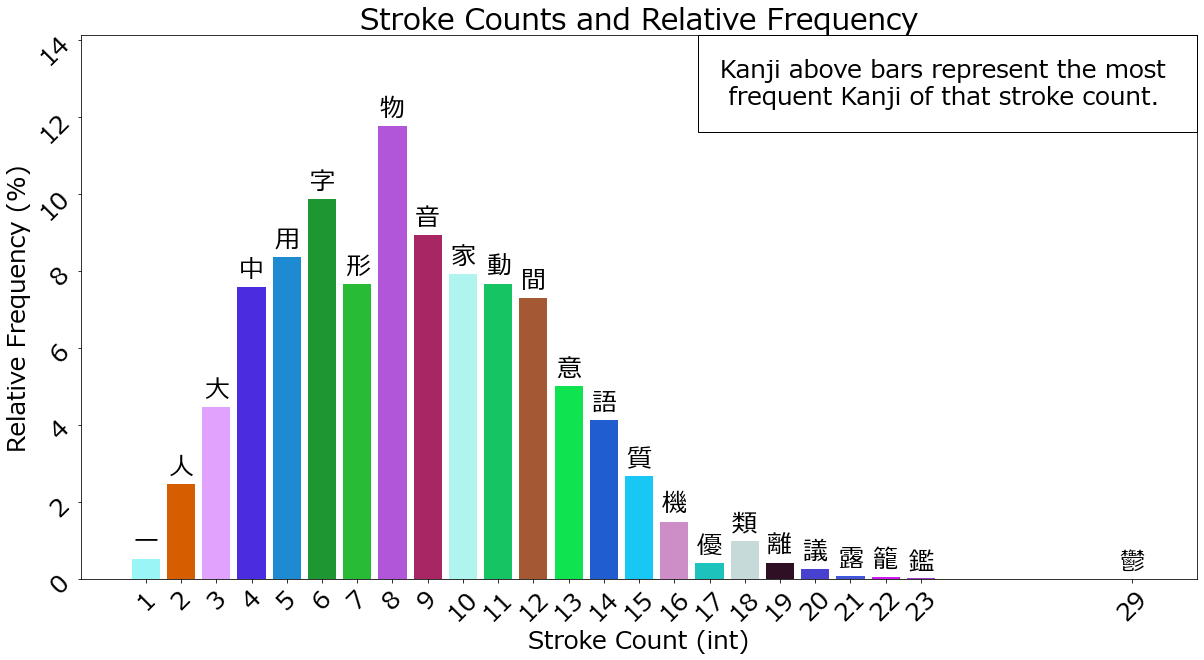

In [101]:
r = lambda:random.randint(0,255)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(df["Stroke Count"].size)]

x = df["Stroke Count"]
y = df["Relative Frequency"]

fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(x = x,height = y,color = my_colors,width = 0.8,tick_label=x)
ax.tick_params(labelrotation=45)
ax.set_ylabel("Relative Frequency (%)")
ax.set_xlabel("Stroke Count (int)")
ax.set_title("Stroke Counts and Relative Frequency")

plt.rc('font', family='Meiryo',size=25)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(d[height]),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
autolabel(rects)


at = AnchoredText("Kanji above bars represent the most \n frequent Kanji of that stroke count.",loc="upper right")
at.patch.set_boxstyle("square,pad=0.5")
ax.add_artist(at)



plt.margins(0.05, 0.2)
#plt.savefig("StrokeCountRelFreq.png")

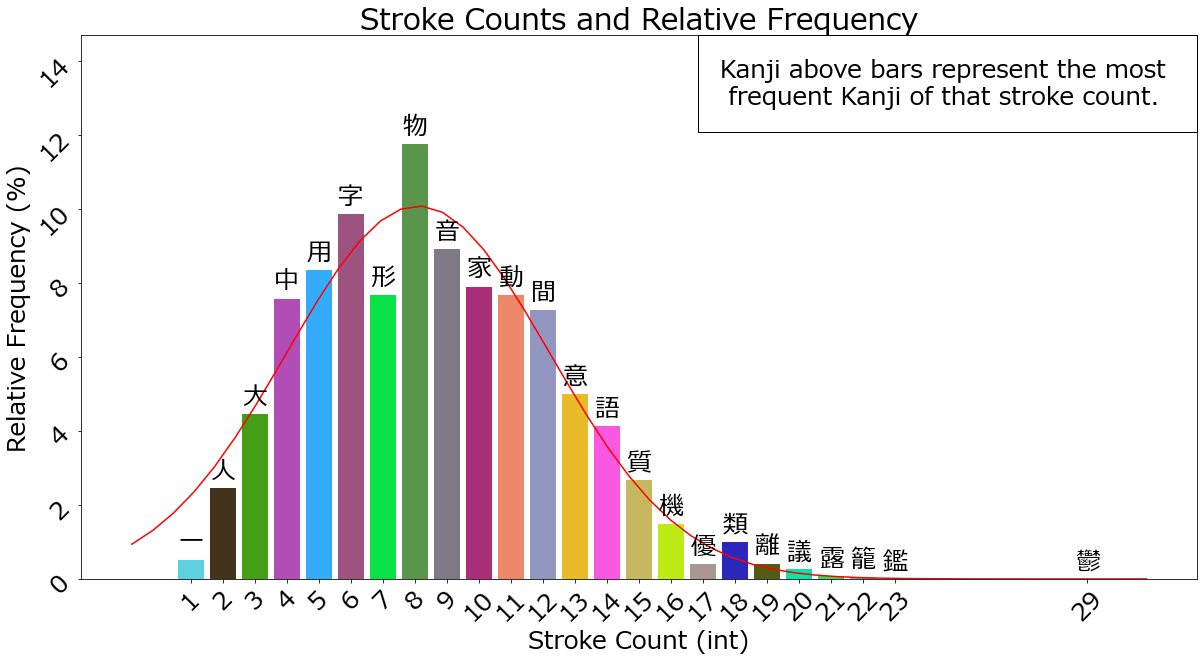

In [102]:
r = lambda:random.randint(0,255)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(df["Stroke Count"].size)]

x = df["Stroke Count"]
y = df["Relative Frequency"]
fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(x = x,height = y,color = my_colors,width = 0.8,tick_label=x)
ax.tick_params(labelrotation=45)
ax.set_ylabel("Relative Frequency (%)")
ax.set_xlabel("Stroke Count (int)")
ax.set_title("Stroke Counts and Relative Frequency")

plt.rc('font', family='Meiryo',size=25)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(d[height]),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
autolabel(rects)

at = AnchoredText("Kanji above bars represent the most \n frequent Kanji of that stroke count.",loc="upper right")
at.patch.set_boxstyle("square,pad=0.5")
ax.add_artist(at)

def func(x,a,b,c):
    return a * np.exp(-(x-b)**2/(2*c**2))

popt,pcov = curve_fit(func,x,y)
xmin,xmax = plt.xlim()

x = np.linspace(xmin,xmax)
y = func(x,*popt)

plt.plot(x, y , c='r')


plt.margins(0.05, 0.25)
#plt.savefig("StrokeCountRelFreq.png")

([<matplotlib.patches.Wedge at 0x26623b50>,
 [Text(1.025747584807775, 0.39729320691526593, 'Strokes: 8'),
  Text(0.5480589391495139, 0.9537459825437324, 'Strokes: 6'),
  Text(-0.07607485860238933, 1.0973662177635262, 'Strokes: 9'),
  Text(-0.6324254750536924, 0.9000211211427828, 'Strokes: 5'),
  Text(-0.9918588453051639, 0.4756217309899824, 'Strokes: 10'),
  Text(-1.0990177031295687, -0.04647674910971421, 'Strokes: 7'),
  Text(-0.9523366896396095, -0.5505041594450222, 'Strokes: 11'),
  Text(-0.5913204042642695, -0.9275452439103664, 'Strokes: 4'),
  Text(-0.11043625349136442, -1.0944422478663693, 'Strokes: 12'),
  Text(0.30975394794555194, -1.0554868505728268, 'Strokes: 13'),
  Text(0.6052180763140321, -0.9185374679906871, 'Strokes: 3'),
  Text(0.8280205029838122, -0.7241422834211761, 'Strokes: 14'),
  Text(0.9627685802729337, -0.5320494909679361, 'Strokes: 15'),
  Text(1.0356923498677635, -0.37059594766455606, 'Strokes: 2'),
  Text(1.0735854950501769, -0.23961257232847183, 'Strokes: 16

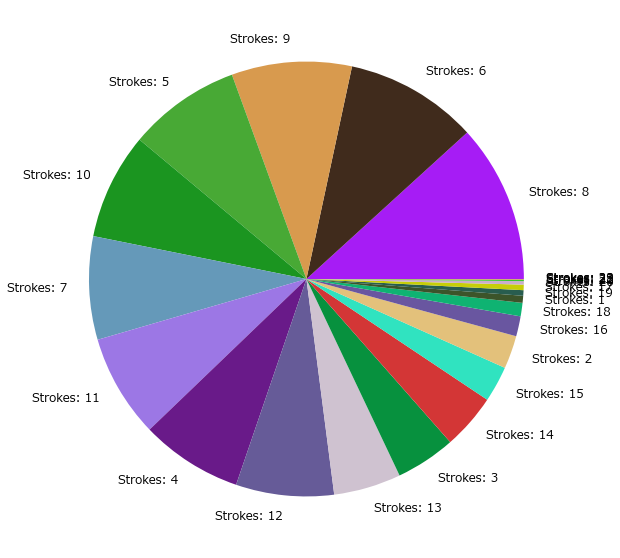

In [103]:
r = lambda:random.randint(0,255)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(df["Stroke Count"].size)]

labels = ["Strokes: {}".format(k) for k,v in fx.items()]
sizes = [v for k,v in fx.items()]

fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', family='Meiryo',size=12)
plt.pie(sizes,labels=labels,colors = my_colors)



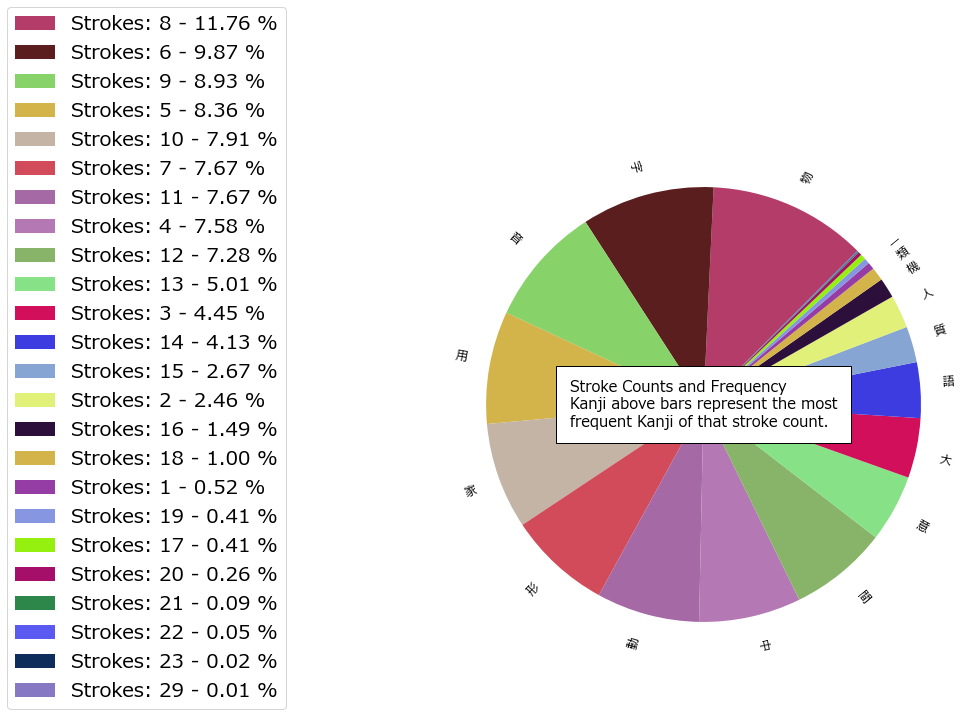

In [104]:
r = lambda:random.randrange(0,255,15)
my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(df["Stroke Count"].size)]

fig, ax = plt.subplots(figsize=(10,5))

x_labs = ["Strokes: {}".format(k) for k,v in fx.items()]
y_labs = np.array([v for k,v in fx.items()])

chars = []

for k, v in d.items():
    if k > 0.5:
        chars.append(v)
    else:
        chars.append("")

porcent = 100.*y_labs/y_labs.sum()

patches, texts = plt.pie(y_labs,labels=chars,colors=my_colors, startangle=45, radius=2,rotatelabels=True)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x_labs, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y_labs),
                                          key=lambda x_labs: x_labs[2],
                                          reverse=True))

plt.rc('font', family='Meiryo',size=15)

at = AnchoredText("Stroke Counts and Frequency\nKanji above bars represent the most\nfrequent Kanji of that stroke count.",loc="center")
at.patch.set_boxstyle("square,pad=0.5")
ax.add_artist(at)
plt.legend(patches, labels, loc='best',bbox_to_anchor = (-1,2),fontsize=20)
plt.savefig("StrokesPiePlot.png")